# Лабораторная работа №3 «Цифровой спектральный анализ детерминированных сигналов»



In [94]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
import scipy.io.wavfile

In [95]:
# Если используете Google Colab, то установите backend inline
# %matplotlib inline

In [96]:
# Если используете Jupyter, то установите backend notebook
%matplotlib widget

# Занятие 1. ДПФ и спектральный анализ.

## Задача 1.1.  Частотная ось ДПФ.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello1.wav' | 'cello2.wav' | 'glockenspiel.wav' | 'vibraphone1.wav' | 'clarinet.wav' | 'guitar.wav' |

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | 'cello3.wav' | 'cello4.wav' | 'tuning-fork.wav' | 'vibraphone2.wav' | 'flute.wav' | 'wine-glass.wav' |




Считайте отсчеты дискретного сигнала $x[k]$, содержащегося в аудиофайле Вашего варианта. 

1) Выберите $y[k]$ — часть информативной области сигнала $x[k]$ длиной $2^{14}$ отсчетов. Если в файле меньше $2^{14}$ отсчетов, дополните ее нулями до этого числа отчетов справа.  

2) Постройте с помощью алгоритма БПФ один период ДВПФ сигнала $y[k]$. Укажите расстояние между точками по оси частот. Ось частот приведите в Гц. Определите по графику частоты основных гармонических компонент. 

3) выведите график сигнала $y[k]$ в области, где наблюдается колебание. По графику оцените период этого колебания $T_0$. Сравните частоту $f_0=1/ T_0$ с частотами основных гармоник из п.2.

4) Как влияет максимальный уровень боковых лепестков оконной функции на результат спектрального анализа? 


Частота дискретизации 44100 Гц
Тип данных int16
Размер массива (180224,)
Число отсчетов записи 180224
0.37151927437641724


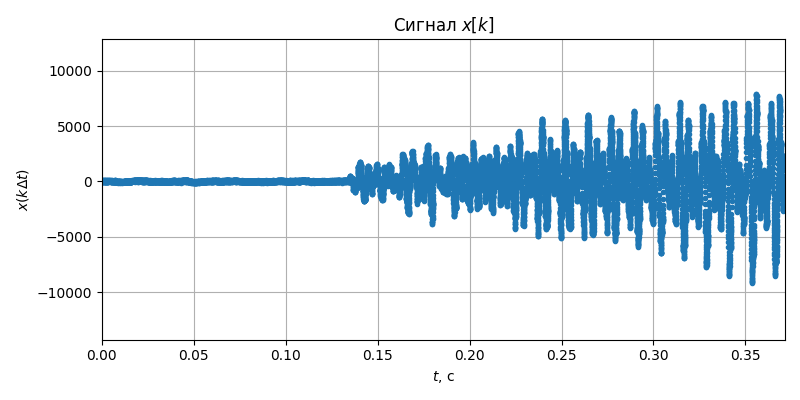

Размерность ДПФ 16384


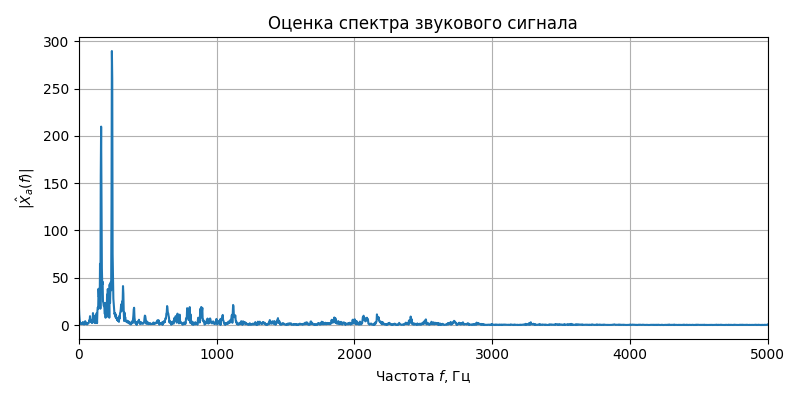

1055.000 Гц
0.000948 с


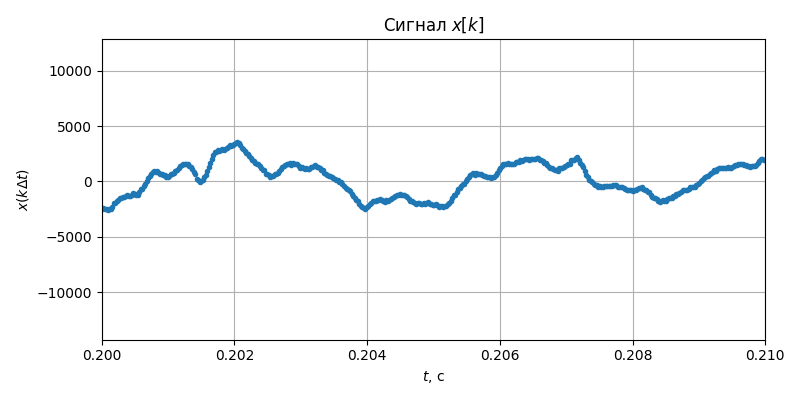

0.00095 с
1052.632 Гц


In [97]:
from IPython.display import Audio
import scipy.fft

fs, x = scipy.io.wavfile.read('cello1.wav')
print("Частота дискретизации %.0f Гц" %fs)
print("Тип данных", x.dtype)
print("Размер массива", x.shape)
print("Число отсчетов записи", x.shape[0])

Audio('cello1.wav')

if len(x.shape)==2:
    x=x[:, 0]

print(2**14/fs)
    
plt.figure(figsize=[8, 4])
plt.plot(np.arange(x.size)/fs, x, '.')
plt.grid()
plt.xlim([0, 2**14/fs])
plt.title("Cигнал $x[k]$")
plt.xlabel("$t$, c")
plt.ylabel("$x(k\Delta t)$")
plt.tight_layout()
plt.show()

Nfft=max(scipy.fft.next_fast_len(2**14), 2**14) 
f, Xf = np.linspace(-0.5*fs, 0.5*fs, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(x[:2**14]/fs, Nfft))

print("Размерность ДПФ", Nfft) 

plt.figure(figsize=[8, 4])
plt.title("Оценка спектра звукового сигнала")
plt.plot(f, abs(Xf), '-')
plt.xlim([0, 5000])
plt.grid()
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|\hat{X}_a(f)|$")
plt.tight_layout()
plt.show()

print("%.3f Гц" % (3160-2105))
print("%.6f с" % (1/(3160-2105)))

plt.figure(figsize=[8, 4])
plt.plot(np.arange(x.size)/fs, x, '.')
plt.grid()
plt.xlim([0.2, 0.21])
plt.title("Cигнал $x[k]$")
plt.xlabel("$t$, c")
plt.ylabel("$x(k\Delta t)$")
plt.tight_layout()
plt.show()

print("%.5f с" % (0.20110-0.20015))
print("%.3f Гц" % (1/(0.20110-0.20015)))

## Задача 1.2. Задача распознавания спектральных компонент. 

Считайте последовательность $x[k]$ из файла Вашего варианта (`variant_Nv_ex_1_2.npy`, где `Nv` — номер варианта). Известно, что ее аналитическая запись  имеет вид 

$$x[k]=\sum\limits_{m=1}^{M}{{{A}_{m}}}\sin (2\pi \frac{m}{N}k+{{\varphi }_{m}}),\quad k=0,\ 1,\ 2,\ \ldots ,\ N-1,$$


где $N$ — длина последовательности, $M<(N-1)/2$, относительные частоты гармонических компонент совпадают с бинами ДПФ. Определите число компонент,  их амплитуды ${{A}_{m}}$ и фазы ${{\varphi }_{m}}$, $m=1,\dots, M$.


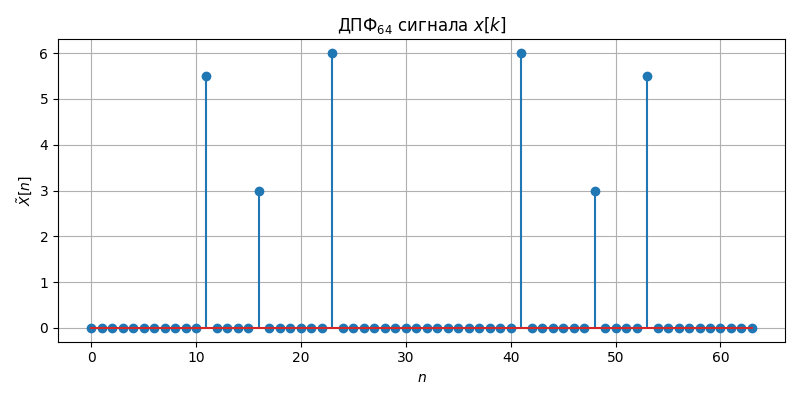

M = 31
A = 10, m = 11, phi = 2.617994
A = 6, m = 16, phi = 1.047198
A = 11, m = 23, phi = 1.570796


In [98]:
Nv=1
N = 64
x = np.load('variant_%i_ex_1_2.npy' %Nv)
Xn=np.fft.fft(x)/N

plt.figure(figsize=[8, 4])
plt.title("ДПФ$_{%i}$ сигнала $x[k]$" %N)
plt.stem(np.arange(Xn.size), abs(Xn))
plt.ylabel("$\\tilde{X}[n]$")
plt.xlabel("$n$")
plt.tight_layout()
plt.grid()
plt.show()

M = int((Xn.size-1)/2)
phi_12 = np.angle(Xn[12])+(np.pi/2)
print("M = %i" % M)
for n in np.arange(M):
    if not np.isclose(abs(Xn)[n], 0):
        print("A = %d, m = %d, phi = %.6f" %(2*abs(Xn)[n], n, np.angle(Xn[n])+(np.pi/2)))

$$x[k] = 14 \sin \left(2\pi  \dfrac{9}{64} k +\pi\right) + 7 \sin \left(2\pi  \dfrac{18}{64} k +\dfrac{\pi}{2}\right) + 5 \sin \left(2\pi  \dfrac{27}{64} k +\dfrac{\pi}{6}\right)$$

# Занятие 2. Окна в спектральном анализе.

## Задача 2.1. Исследование характеристик различных окон.
Рассмотрите следующие окна для ДПФ длиной в $N=20+2N_v$, где $N_v $ — номер Вашего варианта:

1) прямоугольное (`boxcar`),

2) Бартлетта (`bartlett`),

3) Ханна (`hann`),

4) Хэмминга (`hamming`),

5) Блэкмана (`blackman`),

6) окно с плоской вершиной (`flattop`).

Постройте графики для окон во временной области, амплитудно-частотной характеристики окон в линейном масштабе и в дБ. По графикам для каждого окна оцените следующие параметры:

* ширину $\Delta \nu$ главного лепестка на уровне половинной мощности,

* максимальный уровень боковых лепестков относительно главного в дБ,

* асимптотическую скорость спада боковых лепестков в дБ/октава. 

Составьте таблицу с результатами. 


In [99]:
Nv = 1
N = 20 + 2 * Nv
Nfft = 2**14

ks = np.arange(N)
nu = np.linspace(-0.5, 0.5, Nfft)

/tmp/ipykernel_79621/198917259.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))


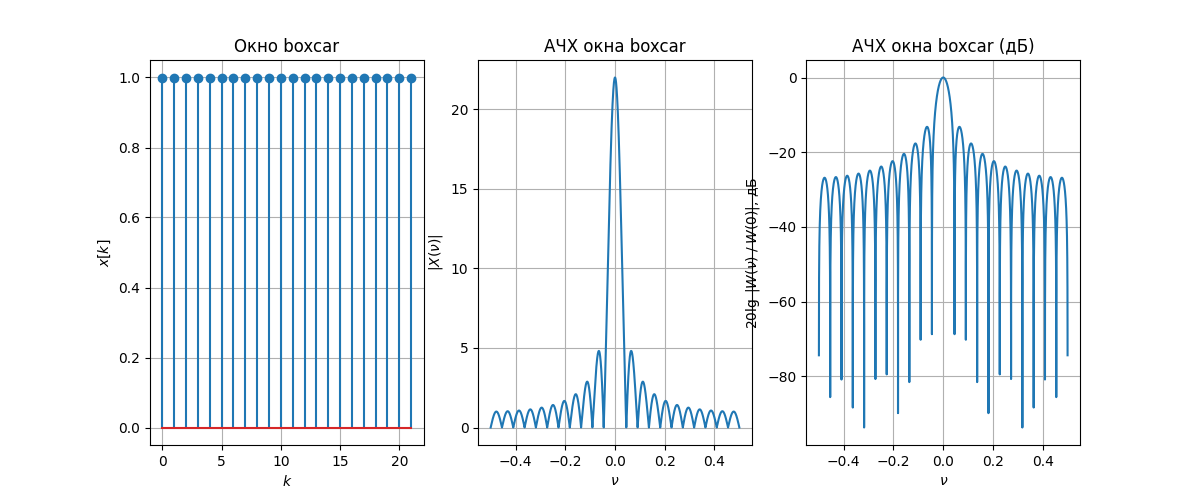

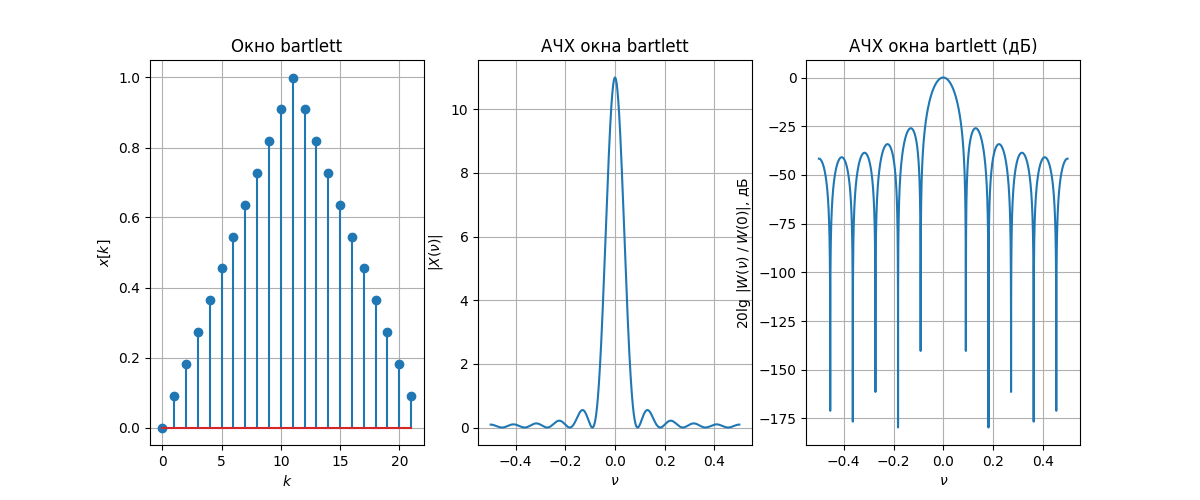

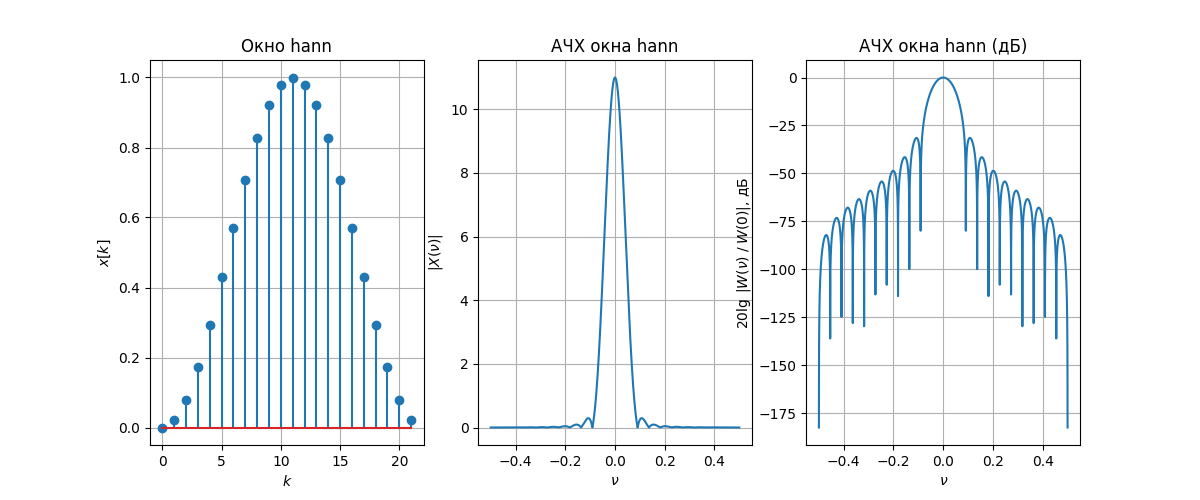

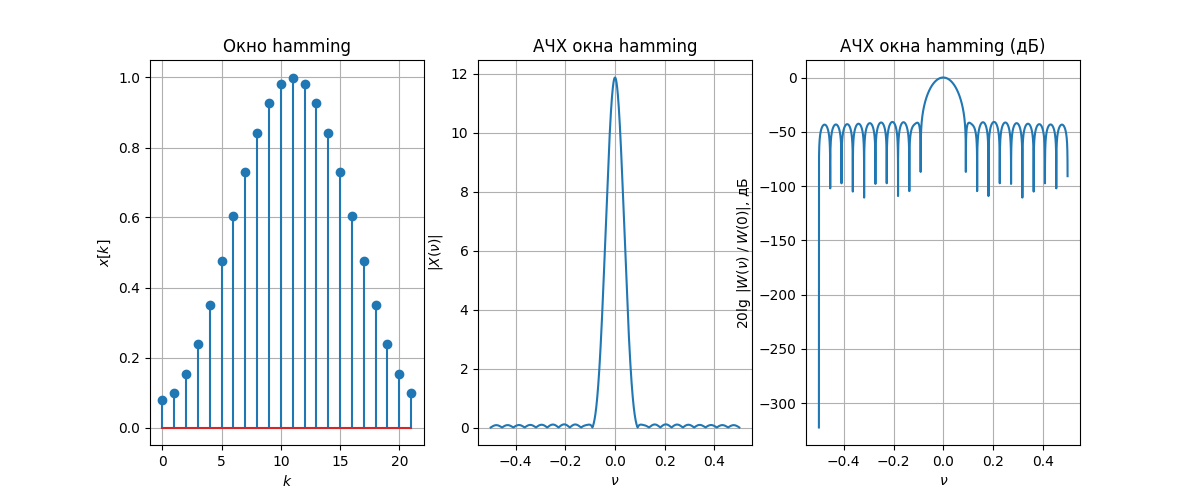

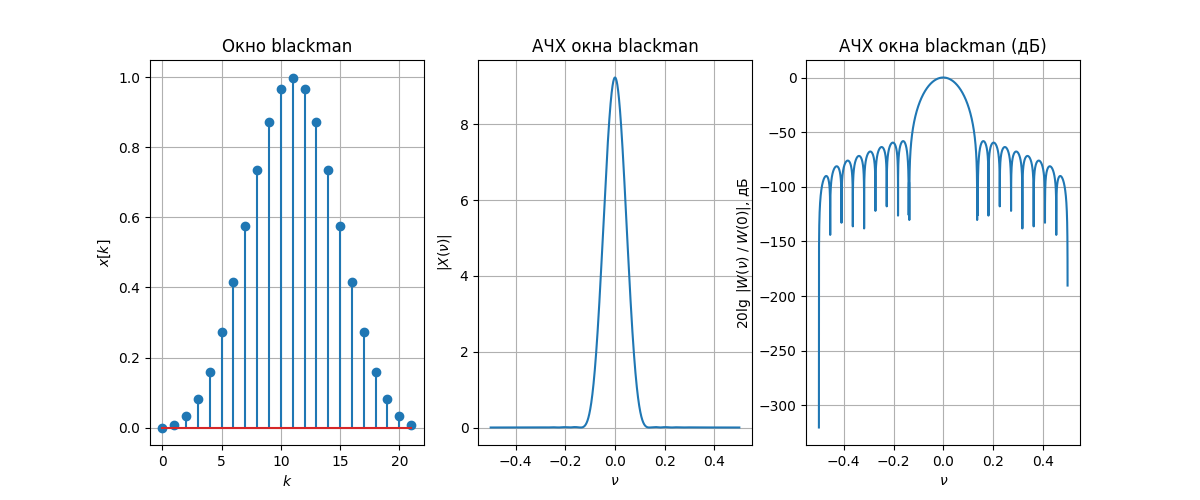

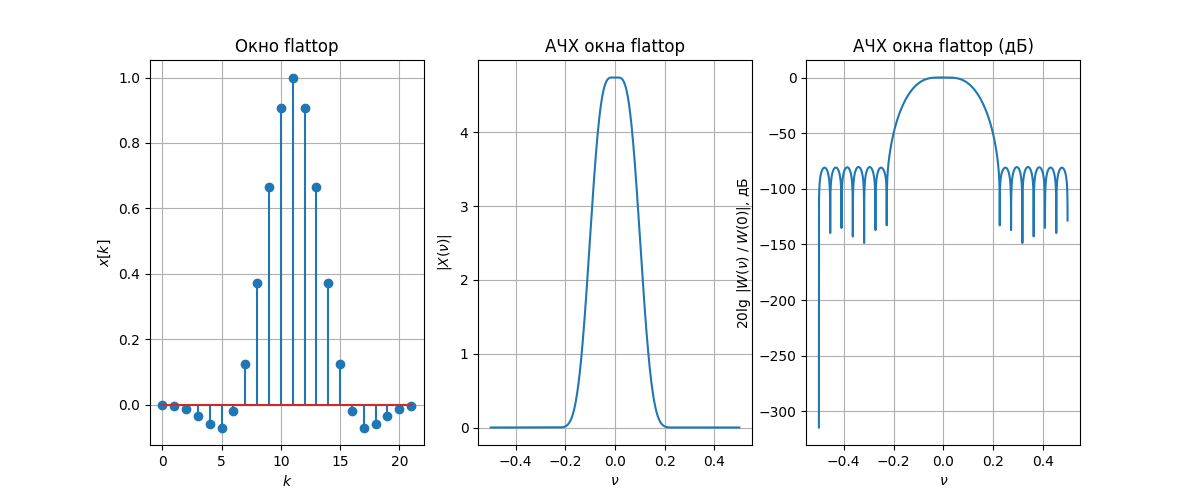

In [100]:
for win in ['boxcar', 'bartlett', 'hann', 'hamming', 'blackman', 'flattop']:
    W = scipy.fft.fftshift(np.fft.fft(signal.get_window(win, N), Nfft))
    
    plt.figure(figsize=[12,5])
    
    plt.subplot(1, 3, 1)
    plt.stem(ks, signal.get_window(win, N))
    plt.title(f'Окно {win}')
    plt.ylabel('$x[k]$')
    plt.xlabel('$k$')
    plt.grid()
    
    plt.subplot(1, 3, 2)
    plt.plot(nu, abs(W))
    plt.title(f'АЧХ окна {win}')
    plt.ylabel('$|X(\\nu)|$')
    plt.xlabel('$\\nu$')
    plt.grid()

    plt.subplot(1, 3, 3)
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
    plt.title(f'АЧХ окна {win} (дБ)')
    plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
    plt.xlabel('$\\nu$')
    plt.grid()

|                                                 | Прямоугольное | Бартлетт | Ханн  | Хамминг | Блэкман | С плоской вершиной |
| :---------------------------------------------: | :-----------: | :------: | :---: | :-----: | :-----: | :----------------: |
| Ширина гл. макс. $\Delta \nu$                   |    0,0714     |  0,1429  |0,1429 | 0,1429  | 0,2143  |       0,3572       |
| Уровень бок. лепест. отн. гл. в дБ              |    -13,22     |  -26,22  |-31,45 | -42,52  | -58,12  |       -82,19       |
| Асимпт. скорость спада бок. лепест. в дБ/октава |       6       |    12    |  18   |    6    |   11    |          -         |

## Задача 2.2. Окно Кайзера.
Повторите вычисления задачи 2.1 для окна Кайзера с параметром $\beta =0;\ \ 5;\ \ 6;\ \ 8,6$. Сравните полученные результаты с предыдущей задачей. 


/tmp/ipykernel_79621/1046371370.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))


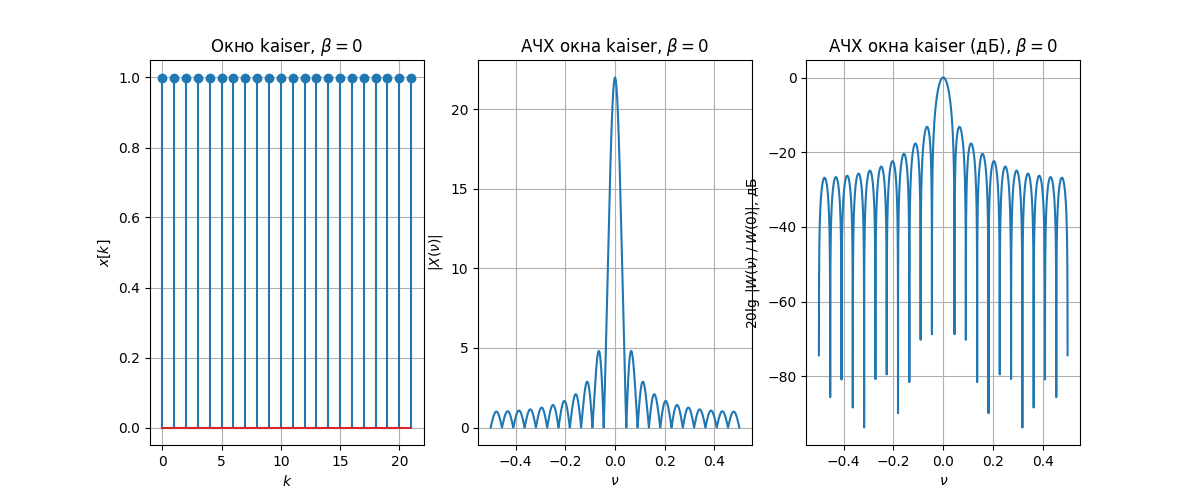

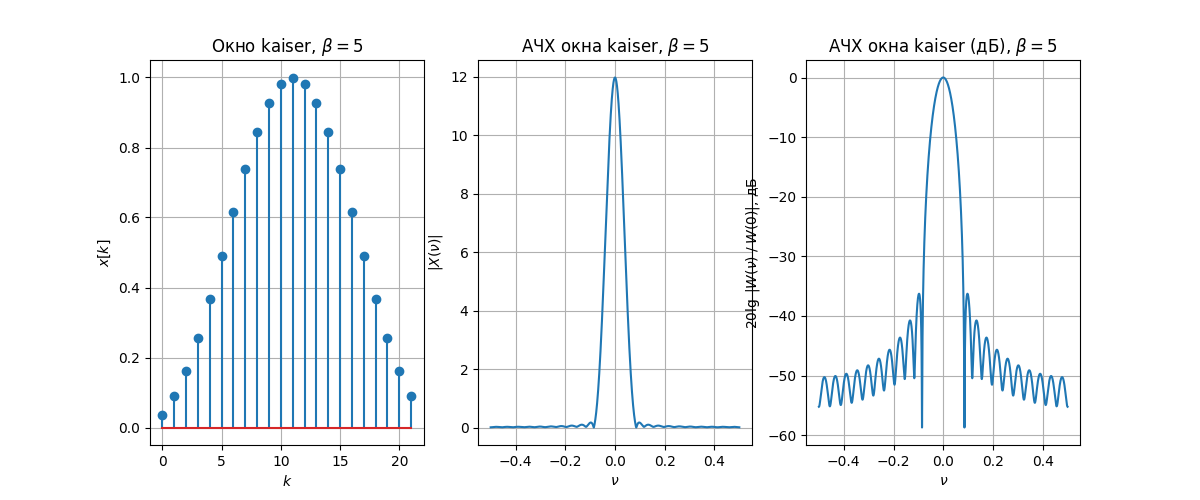

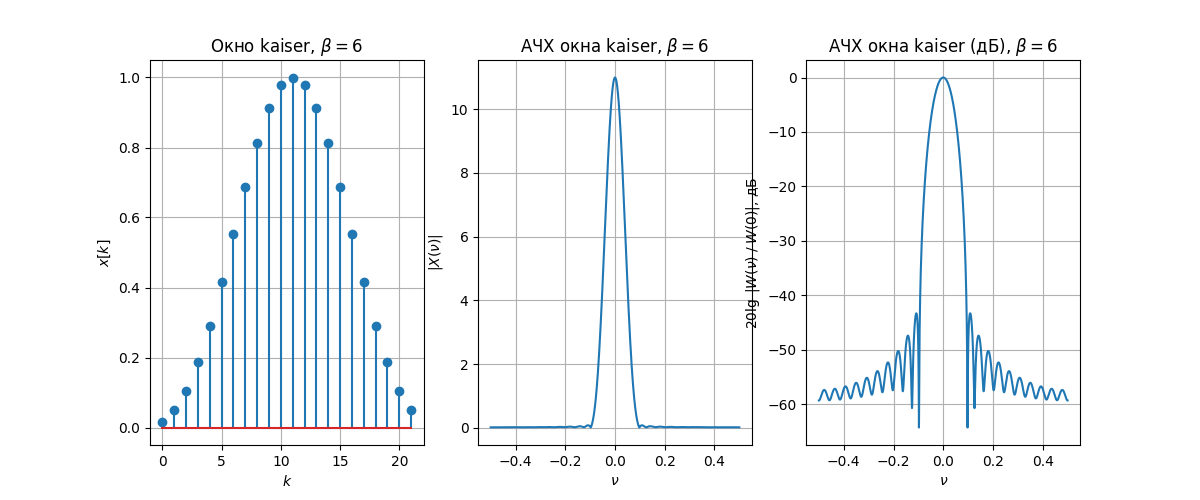

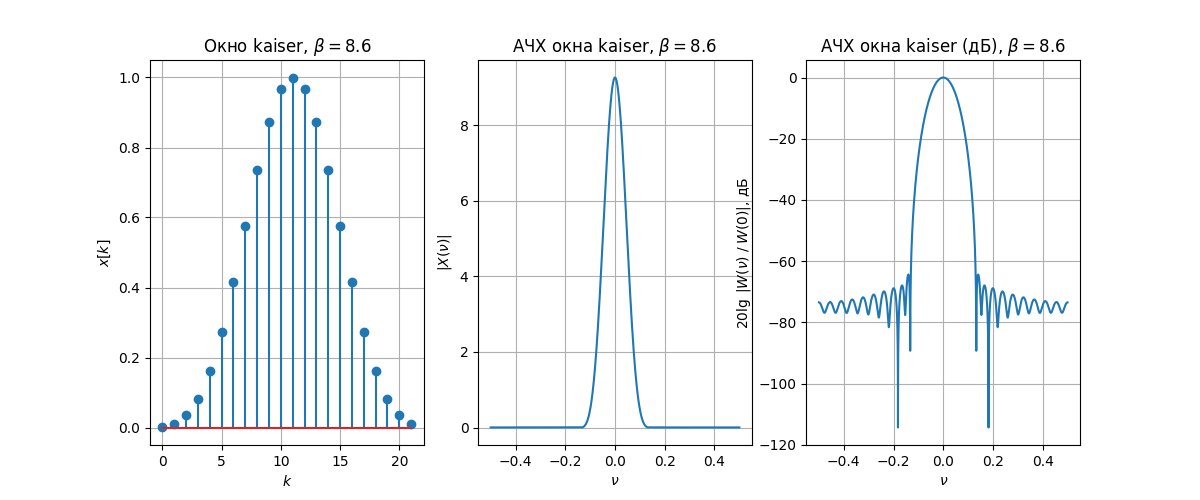

In [101]:
win = 'kaiser'

for b in [0, 5, 6, 8.6]:
    W = scipy.fft.fftshift(np.fft.fft(signal.get_window((win, b), N), Nfft))
    
    plt.figure(figsize=[12,5])
    
    plt.subplot(1, 3, 1)
    plt.stem(ks, signal.get_window((win, b), N))
    plt.title(f'Окно {win}, $\\beta = {b}$')
    plt.ylabel('$x[k]$')
    plt.xlabel('$k$')
    plt.grid()
    
    plt.subplot(1, 3, 2)
    plt.plot(nu, abs(W))
    plt.title(f'АЧХ окна {win}, $\\beta = {b}$')
    plt.ylabel('$|X(\\nu)|$')
    plt.xlabel('$\\nu$')
    plt.grid()

    plt.subplot(1, 3, 3)
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
    plt.title(f'АЧХ окна {win} (дБ), $\\beta = {b}$')
    plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
    plt.xlabel('$\\nu$')
    plt.grid()

|  $\beta$                                        |      0      |      5      |      6      |      8.6      |
| :---------------------------------------------: | :---------: | :---------: | :---------: | :-----------: |
| Ширина гл. макс. $\Delta \nu$                   |    0,0714   |    0,1346   |    0,154    |     0,209     |
| Уровень бок. лепест. отн. гл. в дБ              |   -13,22    |    -36,4    |   -43,47    |    -63,91     |
| Асимпт. скорость спада бок. лепест. в дБ/октава |      6      |     4,5     |      5      |       8       |

## Задача 2.3. Окно Чебышева.
Получите окно Чебышева для четырех уровней боковых лепестков, которые получились в задаче 2.2. Сравните ширину главного лепестка на уровне половинной мощности с результатами предыдущих задач. 


/tmp/ipykernel_79621/4056085202.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))


4.08231692264172
6.578262542084773
6.030057343804261
5.027980463645843
0.0428 0.059 0.0638 0.0742


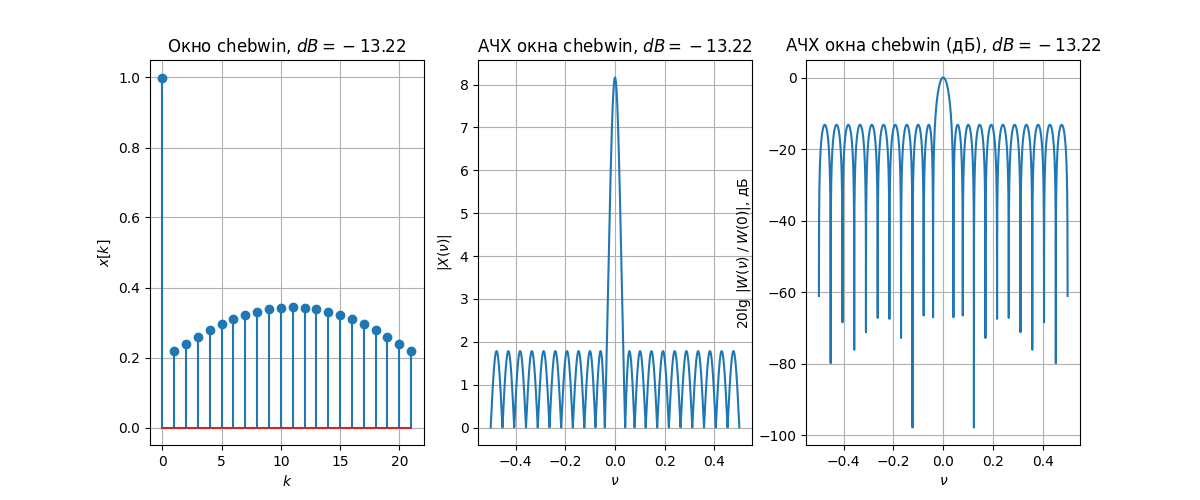

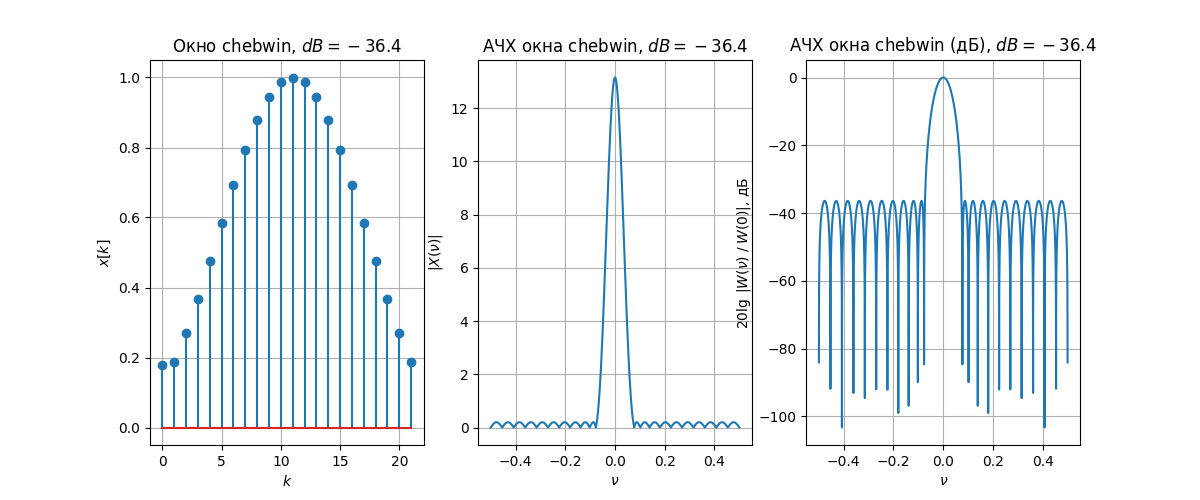

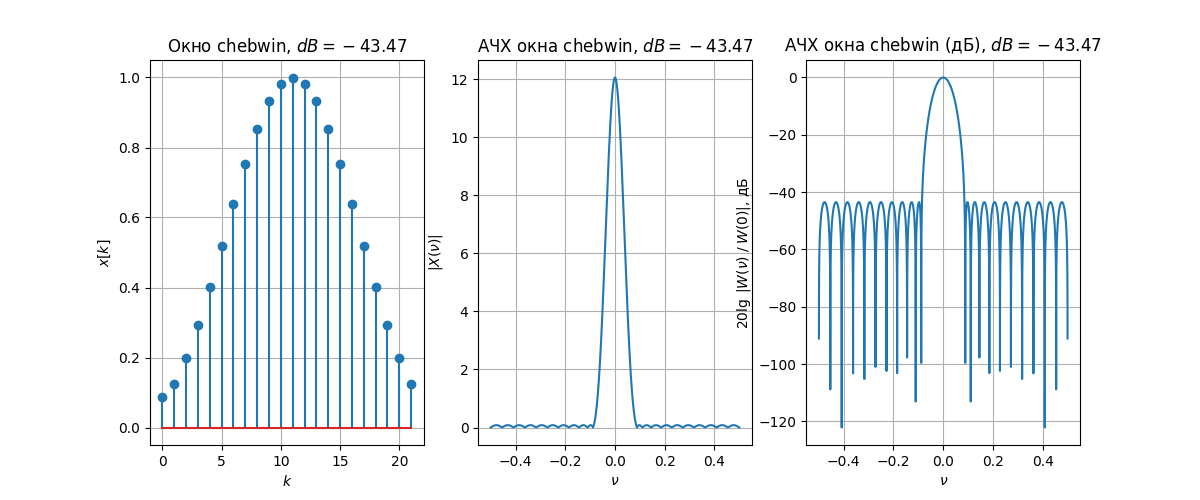

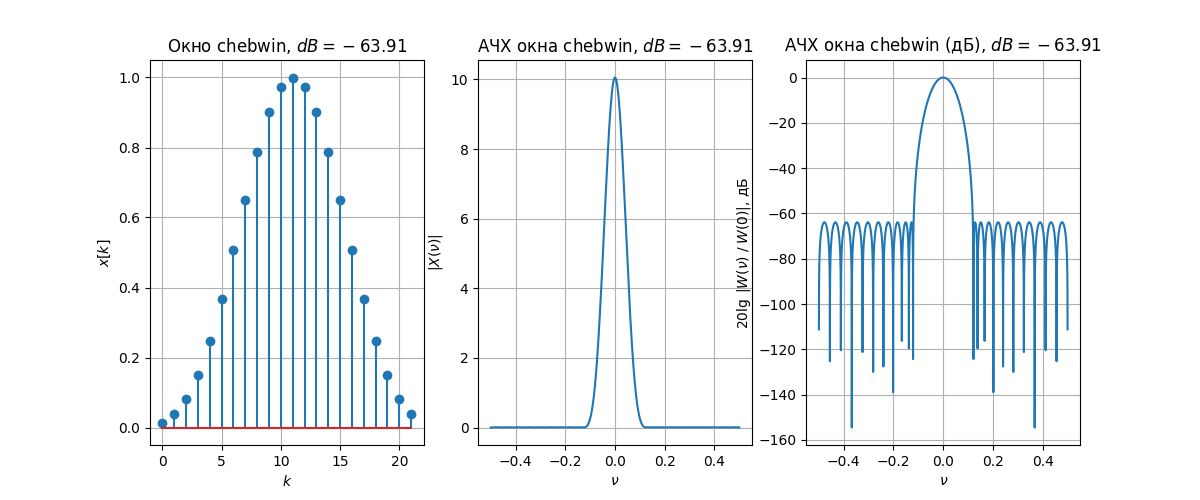

In [102]:
win = 'chebwin'

for at in [-13.22, -36.4, -43.47, -63.91]:
    W = scipy.fft.fftshift(np.fft.fft(signal.get_window((win, at), N, 0), Nfft))
    
    plt.figure(figsize=[12,5])
    
    plt.subplot(1, 3, 1)
    plt.stem(ks, signal.get_window((win, at), N))
    plt.title(f'Окно {win}, $dB = {at}$')
    plt.ylabel('$x[k]$')
    plt.xlabel('$k$')
    plt.grid()
    
    plt.subplot(1, 3, 2)
    plt.plot(nu, abs(W))
    plt.title(f'АЧХ окна {win}, $dB = {at}$')
    plt.ylabel('$|X(\\nu)|$')
    plt.xlabel('$\\nu$')
    plt.grid()

    plt.subplot(1, 3, 3)
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
    plt.title(f'АЧХ окна {win} (дБ), $dB = {at}$')
    plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
    plt.xlabel('$\\nu$')
    plt.grid()
    
    print(max(abs(W))/2)
    
print(0.0214*2, 0.0295*2, 0.0319*2, 0.0371*2)

## Задача 2.4. Различимость спектральных компонент.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11 | 15 | 18 | 17 | 32 | 48 | 15 | 18 | 47 | 32 | 40 | 38 |
|$\beta_0$| 1.1| 1.5 | 1.2 | 1.5 | 1.1 | 1.3 | 1.1 | 1.4 | 1.5 | 1.3 | 1.2 | 1.1 |
|$\beta_1$| 5 | 5.5 | 6.2 | 5.7 | 6.1 | 4.9 | 5.1 | 5.7 | 6 | 5.8 | 5.7 | 5.5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=2048$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)+ \cos\left(2\pi \dfrac{n_0+2}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) окном Кайзера с параметром $\beta=\beta_0.$,

 б) окном Кайзера с параметром $\beta=\beta_1.$
 
 в) окном Блэкмана.
 
Значения параметров $n_0$ и $\beta=\beta_1$ определите из таблицы.
 
Для каких оконных функций гармонические компоненты оказались различимы и почему?

In [103]:
n0, b0, b1 = 11, 1.1, 5
M = 2048
N = 128

ks = np.arange(N)
nu_dft = np.linspace(-0.5, 0.5, num=N, endpoint=False)
nu_dtft = np.linspace(-0.5, 0.5, num=M, endpoint=False)

xk = np.cos(2*np.pi*n0*ks/N) + np.cos(2*np.pi*(n0+2)*ks/N)
x1 = np.cos(2*np.pi*n0*ks/N)
x2 = np.cos(2*np.pi*(n0+2)*ks/N)

print(f"nu1 = {n0/128}, nu2 = {(n0+2)/128}, delta_nu = {2/128}")

nu1 = 0.0859375, nu2 = 0.1015625, delta_nu = 0.015625


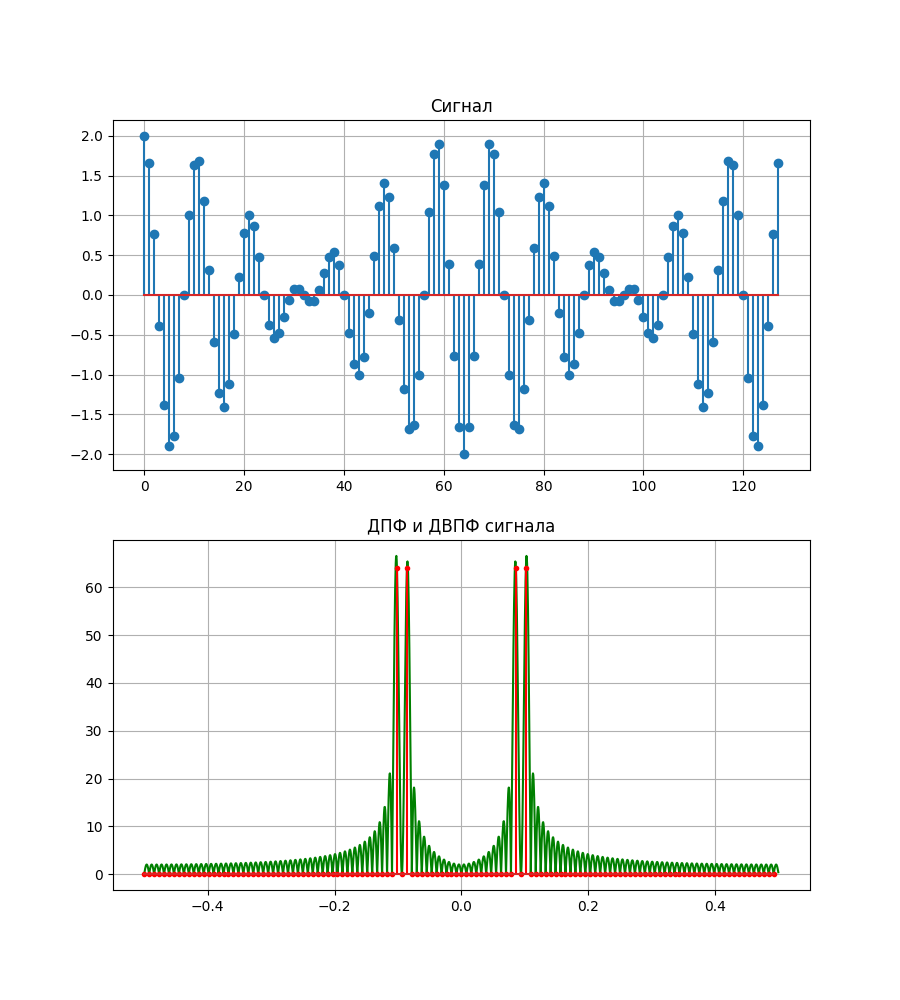

No such comm: d8d15725e4b6487cb4138d9132b5a8e3


In [104]:
X_dft = abs(scipy.fft.fftshift(scipy.fft.fft(xk, N)))
X_dtft = abs(scipy.fft.fftshift(scipy.fft.fft(xk, M)))
W0 = sum(signal.get_window('boxcar', N))

plt.close()

plt.figure(figsize=[9, 10])
plt.subplot(2, 1, 1)
plt.stem(ks, xk)
plt.title('Сигнал')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(nu_dtft, X_dtft, 'g')
plt.stem(nu_dft, X_dft, linefmt='r', markerfmt='.r',)
plt.title('ДПФ и ДВПФ сигнала')
plt.grid()

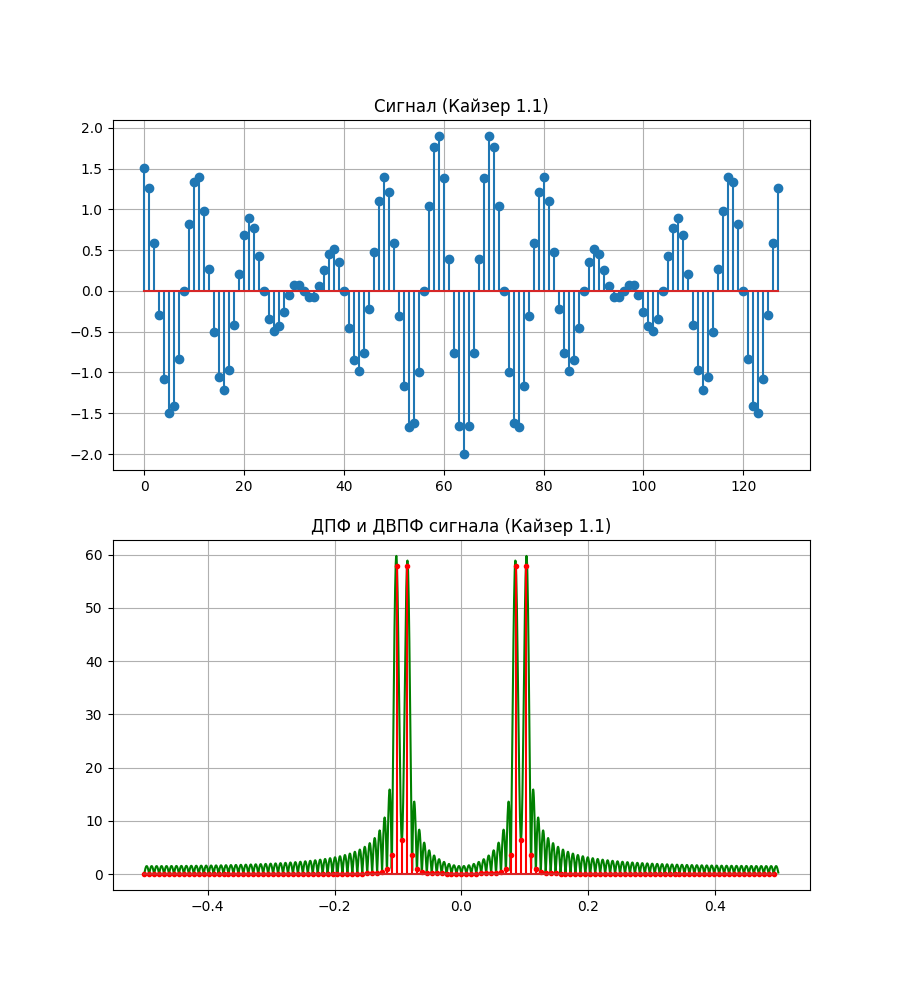

No such comm: 1083b40242aa4c0aac637499610be811


No such comm: d4a9a718c3974e92819694089ce34d0b


No such comm: 145141defe8846c79d610b99e8486bcd


In [ ]:
w = signal.get_window(('kaiser', b0), N)
xk1 = xk * w

X_dft = abs(scipy.fft.fftshift(scipy.fft.fft(xk1, N)))
X_dtft = abs(scipy.fft.fftshift(scipy.fft.fft(xk1, M)))

plt.close()

plt.figure(figsize=[9, 10])
plt.subplot(2, 1, 1)
plt.stem(ks, xk1)
plt.title(f'Сигнал (Кайзер {b0})')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(nu_dtft, X_dtft, 'g')
plt.stem(nu_dft, X_dft, linefmt='r', markerfmt='.r',)
plt.title(f'ДПФ и ДВПФ сигнала (Кайзер {b0})')
plt.grid()

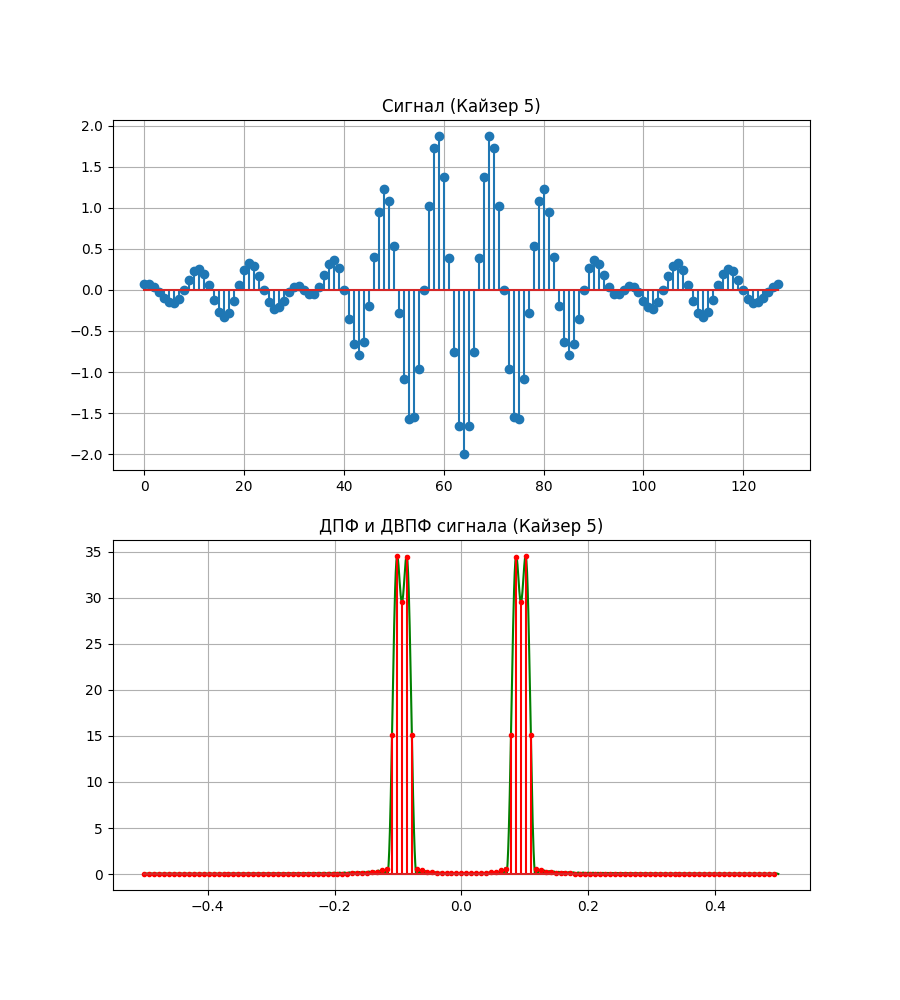

In [ ]:
w = signal.get_window(('kaiser', b1), N)
xk1 = xk * w

X_dft = abs(scipy.fft.fftshift(scipy.fft.fft(xk1, N)))
X_dtft = abs(scipy.fft.fftshift(scipy.fft.fft(xk1, M)))

plt.close()

plt.figure(figsize=[9, 10])
plt.subplot(2, 1, 1)
plt.stem(ks, xk1)
plt.title(f'Сигнал (Кайзер {b1})')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(nu_dtft, X_dtft, 'g')
plt.stem(nu_dft, X_dft, linefmt='r', markerfmt='.r')
plt.title(f'ДПФ и ДВПФ сигнала (Кайзер {b1})')
plt.grid()

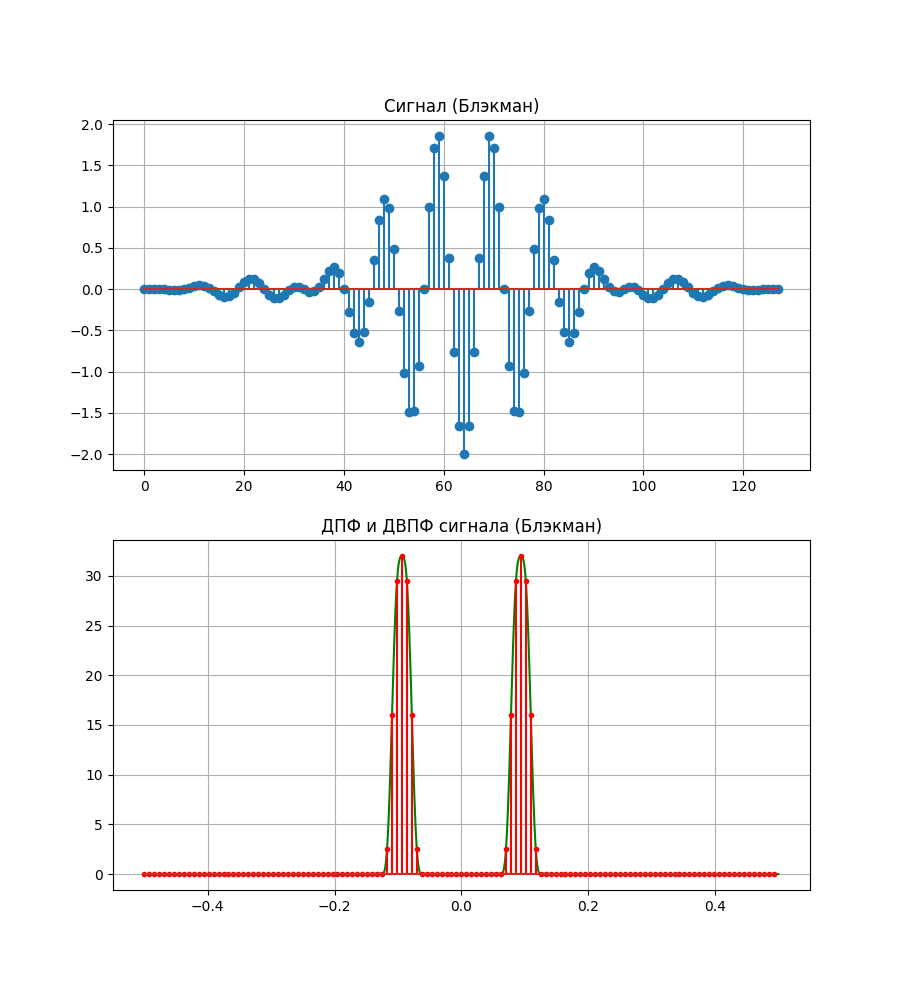

In [ ]:
w = signal.get_window('blackman', N)
xk1 = xk * w

X_dft = abs(scipy.fft.fftshift(scipy.fft.fft(xk1, N)))
X_dtft = abs(scipy.fft.fftshift(scipy.fft.fft(xk1, M)))

plt.close()

plt.figure(figsize=[9, 10])
plt.subplot(2, 1, 1)
plt.stem(ks, xk1)
plt.title('Сигнал (Блэкман)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(nu_dtft, X_dtft, 'g')
plt.stem(nu_dft, X_dft, linefmt='r', markerfmt='.r',)
plt.title('ДПФ и ДВПФ сигнала (Блэкман)')
plt.grid()

Половина амплитуды delta_nu: 0.0101
Половина амплитуды delta_nu: 0.01494
Половина амплитуды delta_nu: 0.01796


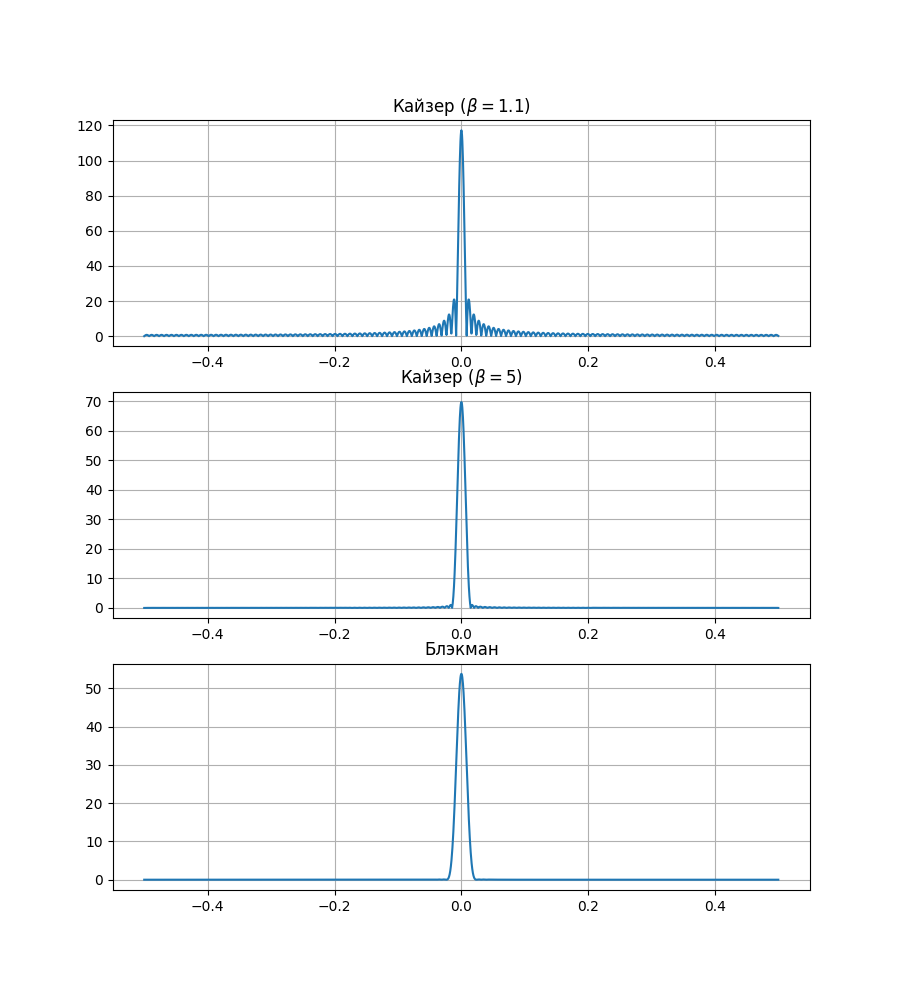

In [ ]:
plt.figure(figsize=[9, 10])

plt.subplot(3, 1, 1)
plt.plot(nu_dtft, abs(scipy.fft.fftshift(scipy.fft.fft(signal.get_window(('kaiser', b0), N), M))))
plt.title(f'Кайзер ($\\beta = {b0}$)')
plt.grid()

print(f'Половина амплитуды delta_nu: {0.00505*2}')

plt.subplot(3, 1, 2)
plt.plot(nu_dtft, abs(scipy.fft.fftshift(scipy.fft.fft(signal.get_window(('kaiser', b1), N), M))))
plt.title(f'Кайзер ($\\beta = {b1}$)')
plt.grid()

print(f'Половина амплитуды delta_nu: {0.00747*2}')

plt.subplot(3, 1, 3)
plt.plot(nu_dtft, abs(scipy.fft.fftshift(scipy.fft.fft(signal.get_window('blackman', N), M))))
plt.title('Блэкман')
plt.grid()

print(f'Половина амплитуды delta_nu: {0.00898*2}')

/tmp/ipykernel_79621/3418142599.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(nu_dtft, 20*np.log10(abs(W)/max(abs(W))))


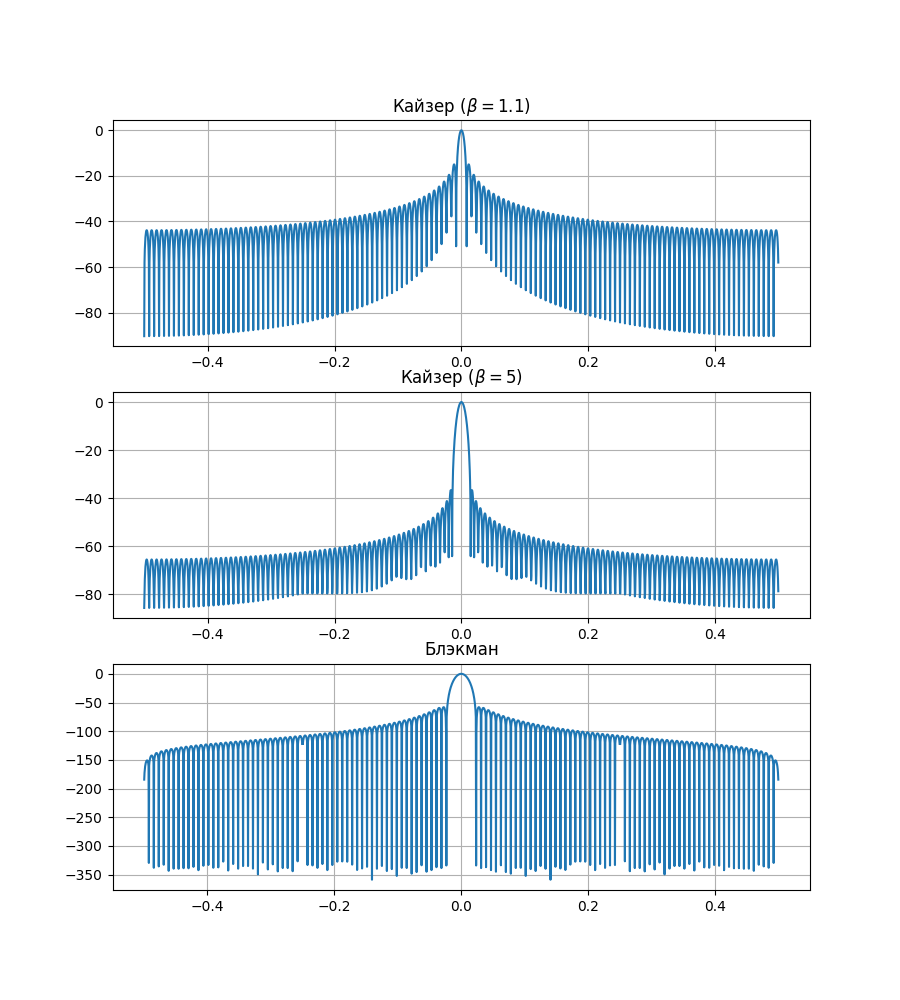

In [ ]:
plt.figure(figsize=[9, 10])

W = scipy.fft.fftshift(scipy.fft.fft(signal.get_window(('kaiser', b0), N), M))

plt.subplot(3, 1, 1)
plt.plot(nu_dtft, 20*np.log10(abs(W)/max(abs(W))))
plt.title(f'Кайзер ($\\beta = {b0}$)')
plt.grid()

W = scipy.fft.fftshift(scipy.fft.fft(signal.get_window(('kaiser', b1), N), M))

plt.subplot(3, 1, 2)
plt.plot(nu_dtft, 20*np.log10(abs(W)/max(abs(W))))
plt.title(f'Кайзер ($\\beta = {b1}$)')
plt.grid()

W = scipy.fft.fftshift(scipy.fft.fft(signal.get_window('blackman', N), M))

plt.subplot(3, 1, 3)
plt.plot(nu_dtft, 20*np.log10(abs(W)/max(abs(W))))
plt.title('Блэкман')
plt.grid()


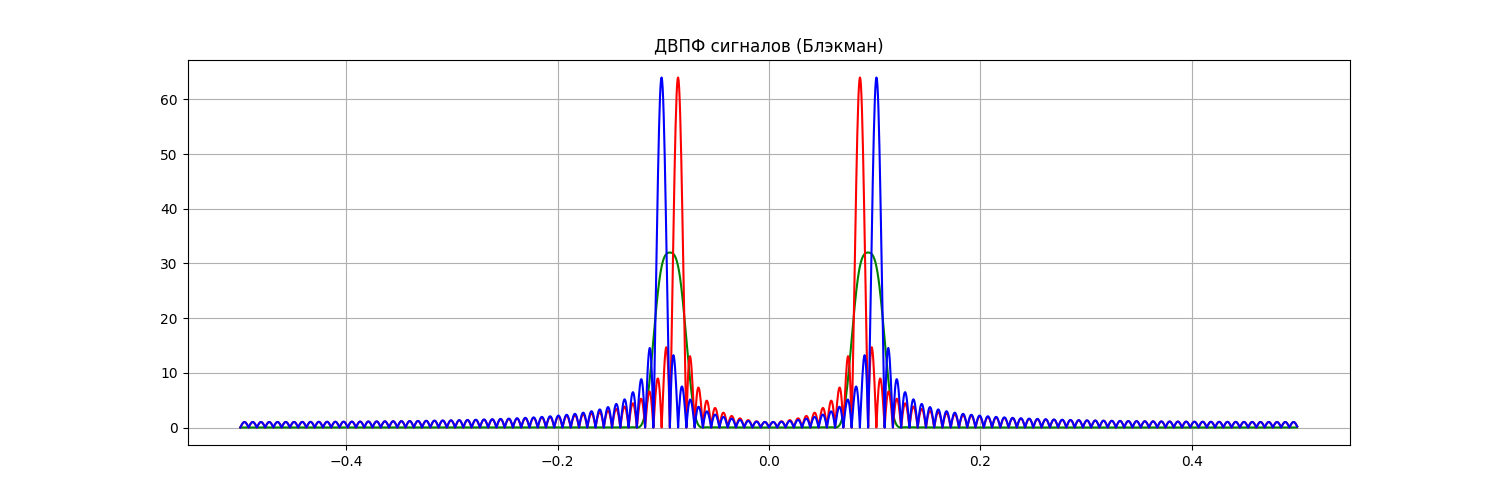

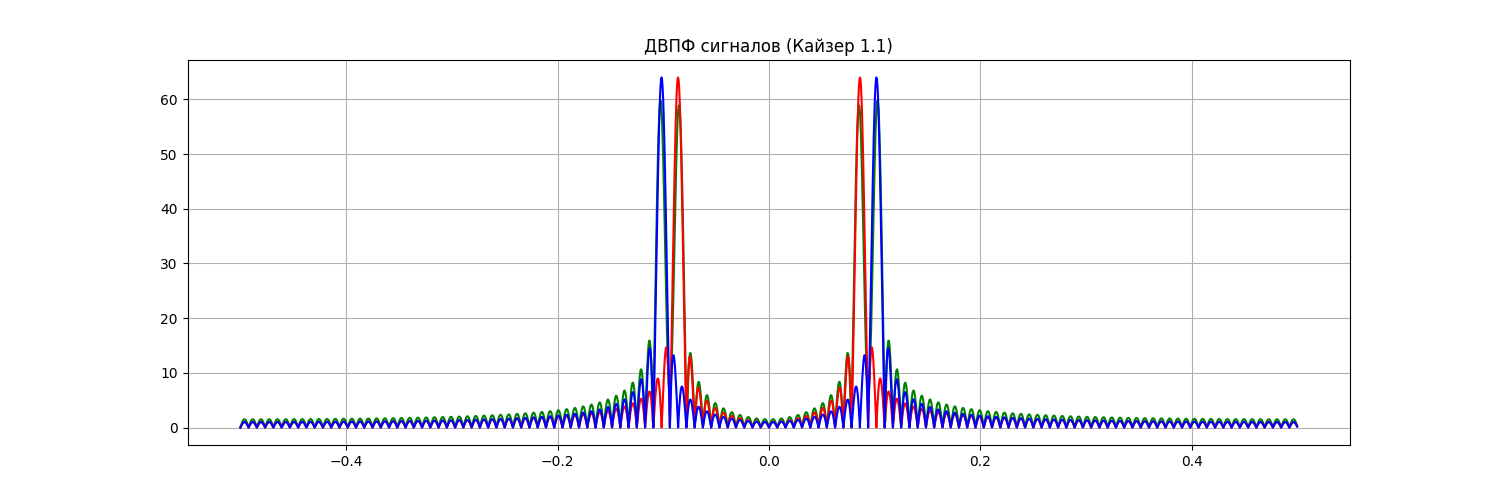

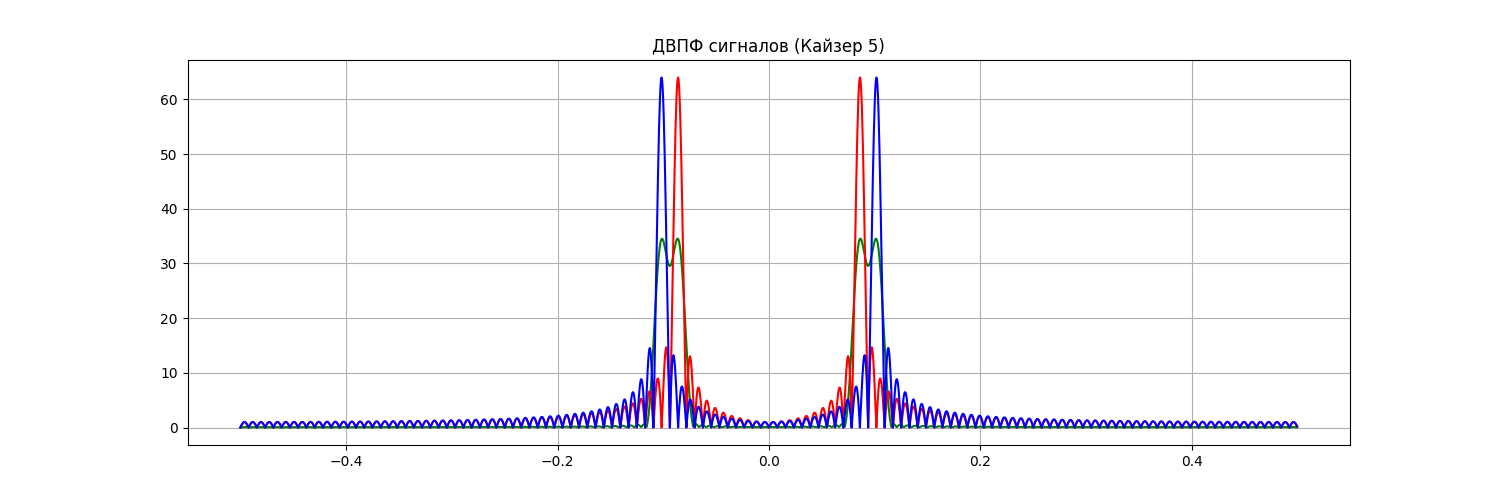

In [ ]:
w = signal.get_window('blackman', N)
xk1 = xk * w

X1 = abs(scipy.fft.fftshift(scipy.fft.fft(x1, M)))
X2 = abs(scipy.fft.fftshift(scipy.fft.fft(x2, M)))
X_dtft = abs(scipy.fft.fftshift(scipy.fft.fft(xk1, M)))

plt.close()
plt.figure(figsize=[15, 5])
plt.plot(nu_dtft, X_dtft, 'g')
plt.plot(nu_dtft, X1, 'r')
plt.plot(nu_dtft, X2, 'b')
plt.title('ДВПФ сигналов (Блэкман)')
plt.grid()

w = signal.get_window(('kaiser', b0), N)
xk1 = xk * w

X_dtft = abs(scipy.fft.fftshift(scipy.fft.fft(xk1, M)))

plt.figure(figsize=[15, 5])
plt.plot(nu_dtft, X_dtft, 'g')
plt.plot(nu_dtft, X1, 'r')
plt.plot(nu_dtft, X2, 'b')
plt.title(f'ДВПФ сигналов (Кайзер {b0})')
plt.grid()

w = signal.get_window(('kaiser', b1), N)
xk1 = xk * w

X_dtft = abs(scipy.fft.fftshift(scipy.fft.fft(xk1, M)))

plt.figure(figsize=[15, 5])
plt.plot(nu_dtft, X_dtft, 'g')
plt.plot(nu_dtft, X1, 'r')
plt.plot(nu_dtft, X2, 'b')
plt.title(f'ДВПФ сигналов (Кайзер {b1})')
plt.grid()

## Задача 2.5. Маскировка слабой гармоники боковыми лепестками окна.


| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Бартлетта | Ханна | Хэмминга | Ханна | Бартлетта | Хэмминга |
| $m_2$ |    -2     |     2    |   -2    |     2    |   -2    |     2    |
| $m_3$ |     4     |     6    |    3    |     4    |    5    |     7    |


| Варианты: |       7      |     8     |         9        |      10     |        11       |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | Хэмминга | Ханна | Бартлетта | Ханна | Хэмминга | Бартлетта |
| $m_2$ |      2     |   -2    |     2    |   -2    |     2    |   -2    |
| $m_3$ |      7     |    3    |    -3    |   -4    |     5    |    4    |

Сгенерировать последовательность отсчетов гармонического сигнала $x[k]$ длительностью $N=64$, которая может быть описана следующей формулой:
$$x[k]=a_1 \sin\left(2\pi k \frac{n}{N}\right) + a_2 \cos\left(2\pi k \frac{n+m_2}{N}\right) - a_3\sin\left(2\pi k \frac{n+m_3}{N}\right),$$
где $a_1 = n = n_\text{v}+10$ ($n_\text{v}$ — номер вашего варианта), $a_2 = \dfrac{a_1}{6}$, $a_3 = \dfrac{a_1}{2}$, $m_2$  и  $m_3$  значения из таблицы, соответствующие вашему варианту.

* Построить ДВПФ $x[k]$, применив прямоугольное окно. Сколько гармонических компонент можно выделить?

* Построить ДВПФ $x[k]$, применив окно Блэкмана. Какие гармонические компоненты наблюдаются теперь?

* Построить ДВПФ $x[k]$, используя окно $w_1[k]$ из вашего варианта. Получилось ли пронаблюдать все гармонические компоненты?

* Подобрать коэффициенты для окон Чебышева и Кайзера так, чтобы возможно было наблюдать все гармонические компоненты. Построить соответствующие графики.

In [106]:
N = 64
M = 2**14
nv = 4
m2 = -2
m3 = 4
w1 = signal.get_window('bartlett', N)

a1 = n = nv + 10
a2 = a1/6
a3 = a1/2

print(n/N, (n+m2)/N, (n+m3)/N)
print((n+m2)/N - n/N)
print((n+m3)/N - (n+m2)/N)
print((n+m3)/N - n/N)
print(a1, a2, a3)

0.21875 0.1875 0.28125
-0.03125
0.09375
0.0625
14 2.3333333333333335 7.0


In [107]:
k = np.arange(N)
t = np.linspace(0, N, num=M)
nu = np.linspace(-0.5, 0.5, num=M)
xk = a1 * np.sin(2*np.pi*k*n/N) + a2 * np.cos(2*np.pi*k*(n+m2)/N) - a3 * np.cos(2*np.pi*k*(n+m3)/N)
xt = a1 * np.sin(2*np.pi*t*n/N) + a2 * np.cos(2*np.pi*t*(n+m2)/N) - a3 * np.cos(2*np.pi*t*(n+m3)/N)

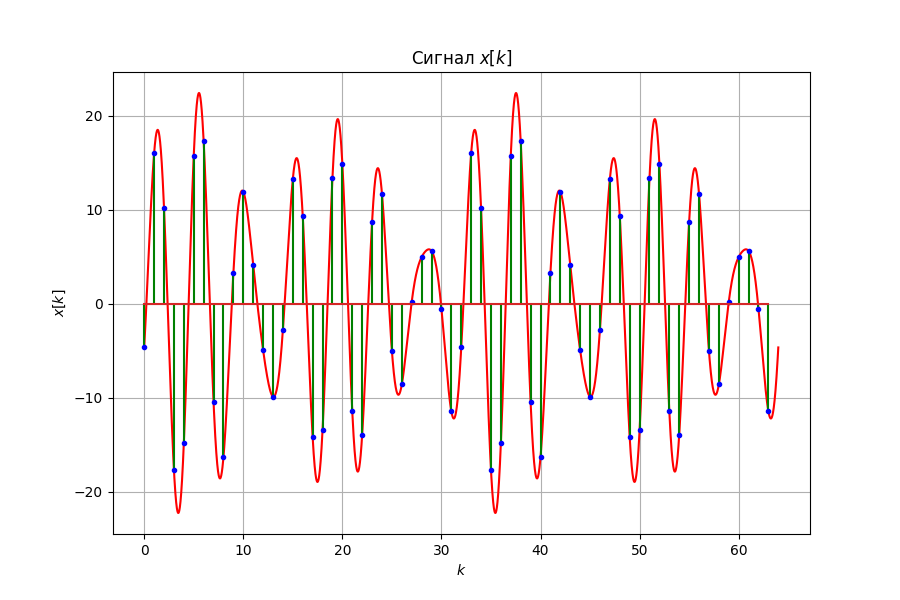

In [108]:
plt.figure(figsize=[9, 6])
plt.plot(t, xt, 'r')
plt.stem(k, xk, linefmt='g', markerfmt='.b')
plt.title('Сигнал $x[k]$')
plt.ylabel('$x[k]$')
plt.xlabel('$k$')
plt.grid()

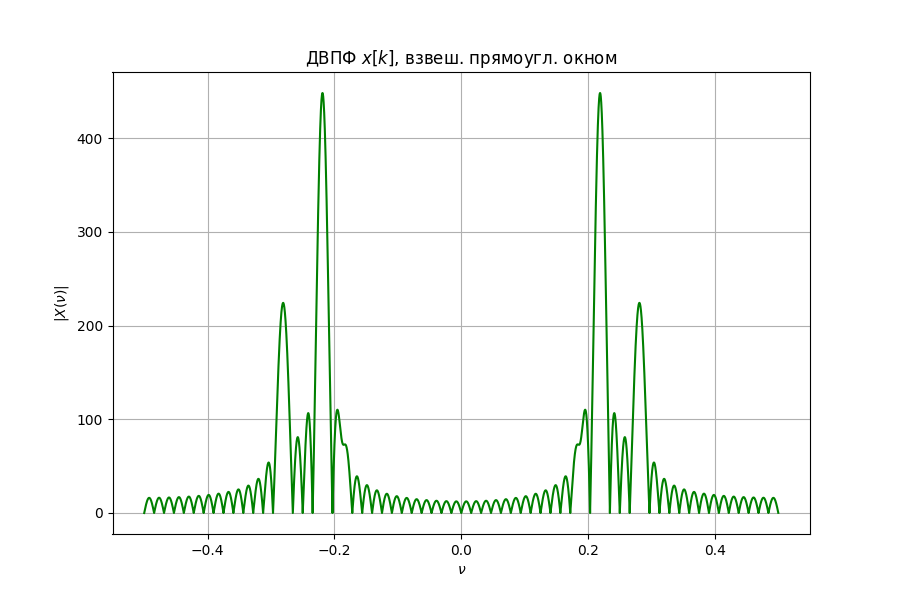

In [109]:
y = signal.get_window('boxcar', N) * xk

X = abs(scipy.fft.fftshift(scipy.fft.fft(y, M)))

plt.figure(figsize=[9, 6])
plt.plot(nu, X, 'g')
plt.title('ДВПФ $x[k]$, взвеш. прямоугл. окном')
plt.ylabel('$|X(\\nu)|$')
plt.xlabel('$\\nu$')
plt.grid()

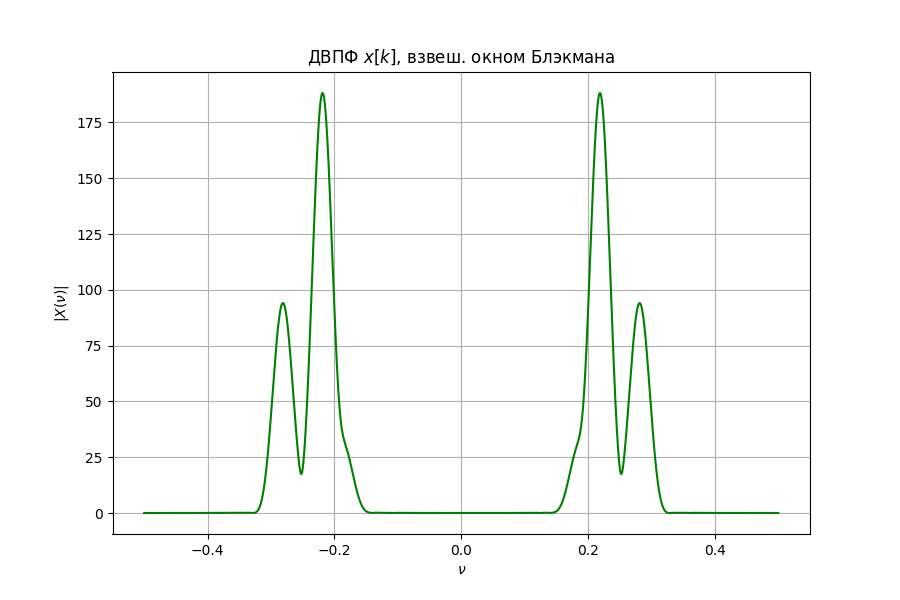

In [110]:
y = signal.get_window('blackman', N) * xk

X = abs(scipy.fft.fftshift(scipy.fft.fft(y, M)))

plt.figure(figsize=[9, 6])
plt.plot(nu, X, 'g')
plt.title('ДВПФ $x[k]$, взвеш. окном Блэкмана')
plt.ylabel('$|X(\\nu)|$')
plt.xlabel('$\\nu$')
plt.grid()

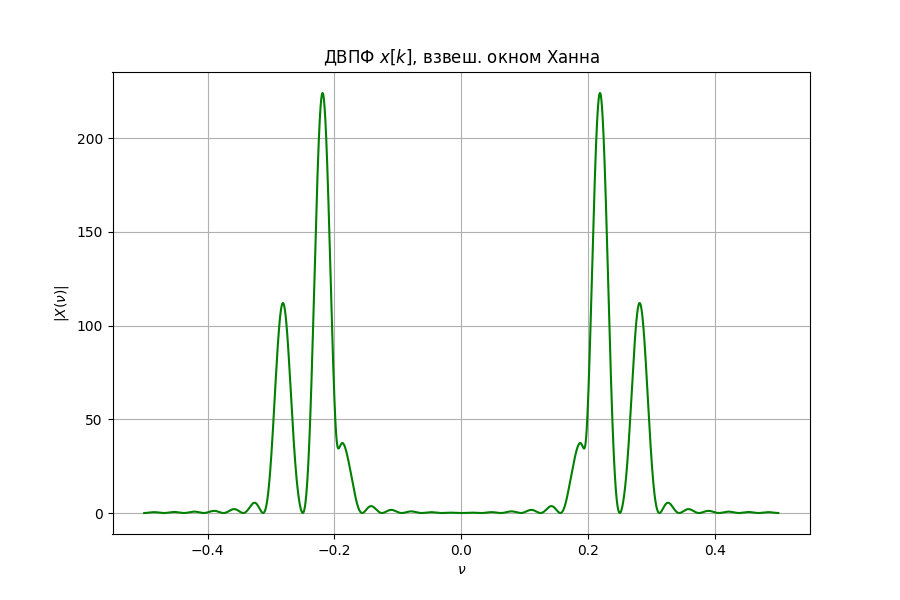

In [111]:
y = w1 * xk

X = abs(scipy.fft.fftshift(scipy.fft.fft(y, M)))

plt.figure(figsize=[9, 6])
plt.plot(nu, X, 'g')
plt.title('ДВПФ $x[k]$, взвеш. окном Бартлетта')
plt.ylabel('$|X(\\nu)|$')
plt.xlabel('$\\nu$')
plt.grid()

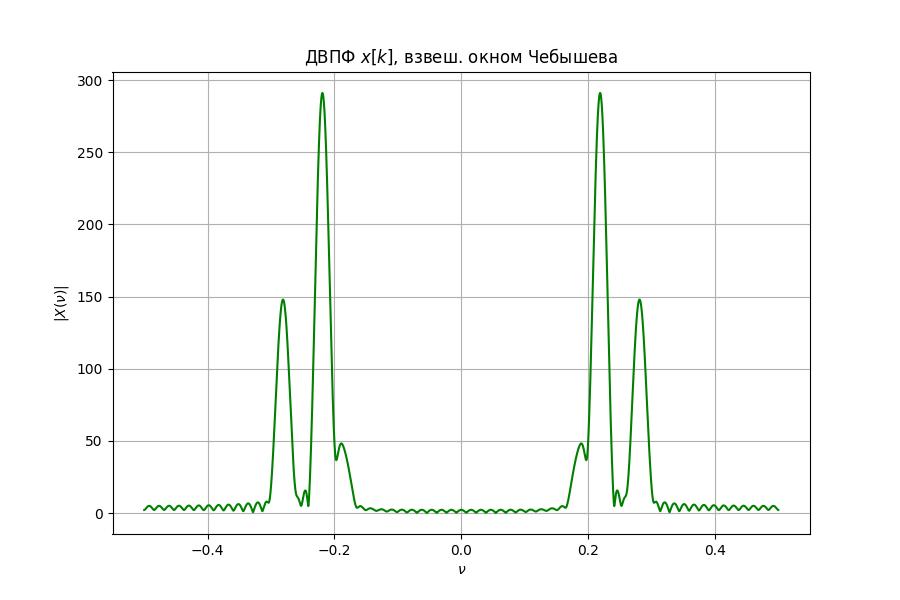

In [112]:
at = -31.5
y = signal.get_window(('chebwin', at), N) * xk

X = abs(scipy.fft.fftshift(scipy.fft.fft(y, M)))

plt.figure(figsize=[9, 6])
plt.plot(nu, X, 'g')
plt.title('ДВПФ $x[k]$, взвеш. окном Чебышева')
plt.ylabel('$|X(\\nu)|$')
plt.xlabel('$\\nu$')
plt.grid()

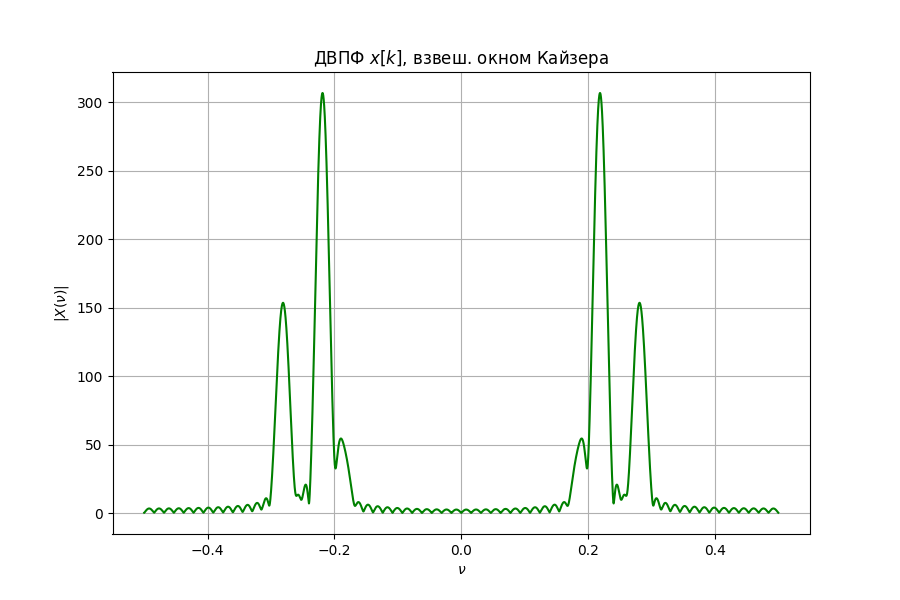

In [113]:
beta = 3
y = signal.get_window(('kaiser', beta), N) * xk

X = abs(scipy.fft.fftshift(scipy.fft.fft(y, M)))

plt.figure(figsize=[9, 6])
plt.plot(nu, X, 'g')
plt.title('ДВПФ $x[k]$, взвеш. окном Кайзера')
plt.ylabel('$|X(\\nu)|$')
plt.xlabel('$\\nu$')
plt.grid()

## Задача 2.6. Амплитудная модуляция спектра.

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$n_0$|11,5 | 15,5 | 18,5 | 17,5 | 32,5 | 48,5 | 15,5 | 18,5 | 47,5 | 32,5 | 40,5 | 38,5 |

Произведите спектральный анализ с помощью ДПФ размерности $M=128$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{128} k\right)$$
 со взвешиванием следующими оконными функциями длиной 128 отчетов:
 
 а) прямоугольным окном (`boxcar`),

 б) окном с плоской вершиной (`flattop`).
 
 
Значение параметра $n_0$ определите из таблицы. Отнормируйте ДПФ на значение АЧХ оконной функции на нулевой частоте ($W(0)=\sum_{k=0}^{N-1} w[k]$). Для двух окон сравните амплитуду гармоники с модулем ближайших к ней отсчетов ДПФ.

In [114]:
n0 = 11.5
M = 128

w1 = signal.get_window('boxcar', M)
w2 = signal.get_window('flattop', M)
W01, W02 = sum(w1), sum(w2)

In [115]:
k = np.arange(M)
n = np.linspace(-0.5, 0.5, num=M)

xk = np.cos(2*np.pi*n0*k/128)

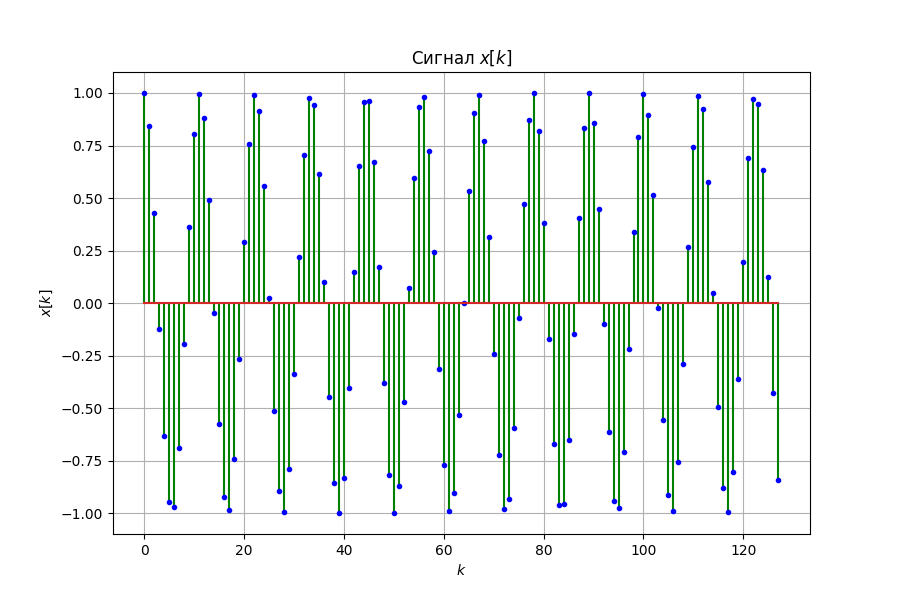

In [116]:
plt.figure(figsize=[9, 6])
plt.stem(k, xk, linefmt='g', markerfmt='.b')
plt.title('Сигнал $x[k]$')
plt.ylabel('$x[k]$')
plt.xlabel('$k$')
plt.grid()

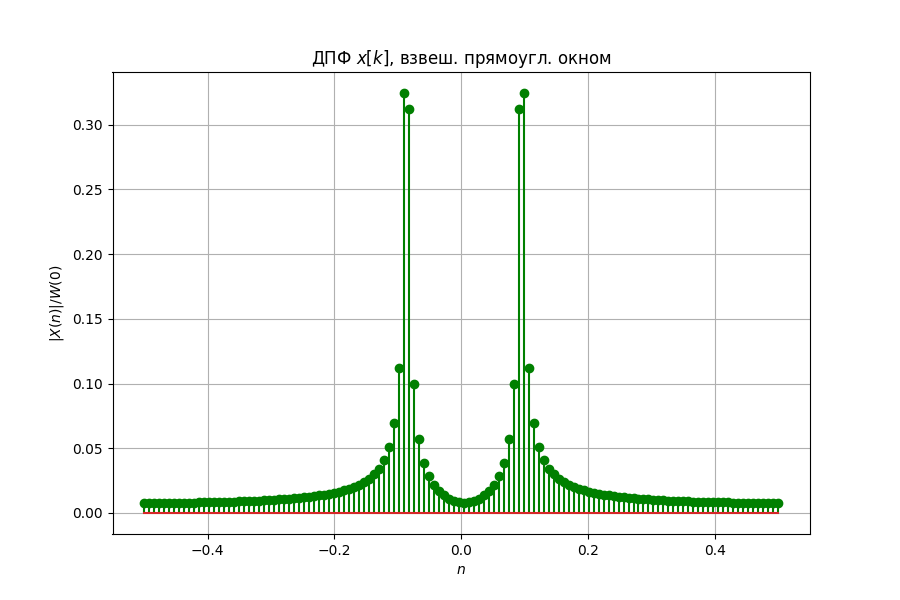

In [117]:
y = xk * w1

X = abs(scipy.fft.fftshift(scipy.fft.fft(y, M)))

plt.figure(figsize=[9, 6])
plt.stem(n, X/W01, 'g')
plt.title('ДПФ $x[k]$, взвеш. прямоугл. окном')
plt.ylabel('$|X(n)| / W(0)$')
plt.xlabel('$n$')
plt.grid()

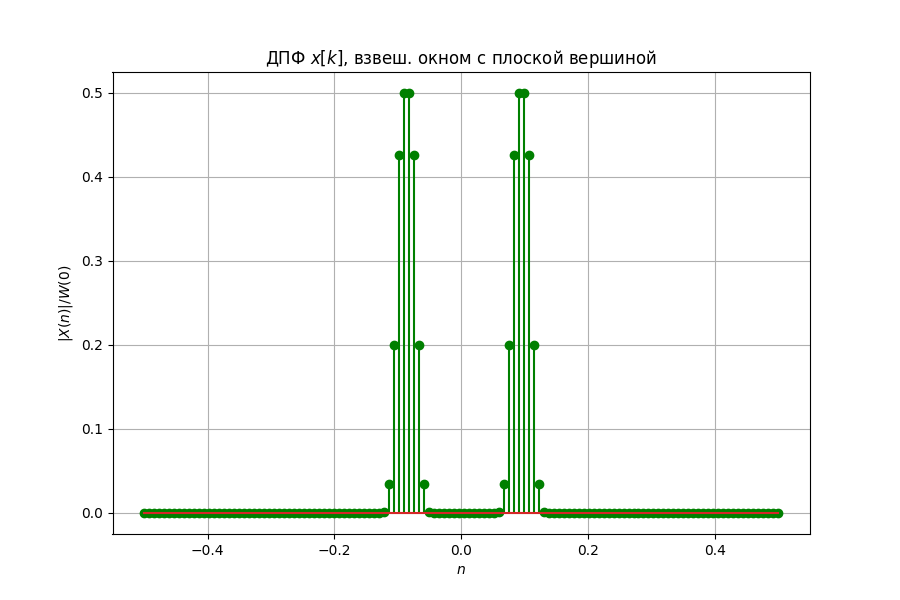

In [118]:
y = xk * w2

X = abs(scipy.fft.fftshift(scipy.fft.fft(y, M)))

plt.figure(figsize=[9, 6])
plt.stem(n, X/W02, 'g')
plt.title('ДПФ $x[k]$, взвеш. окном с плоской вершиной')
plt.ylabel('$|X(n)| / W(0)$')
plt.xlabel('$n$')
plt.grid()

# Занятие 3. Кратковременное дискретное преобразование Фурье (STFT) 

## Задача 3.1. Спектрограмма аудиофайла.  

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'clarinet_minor.wav' | 'clarinet_major32.wav'| 'major_scale_flute1.wav' | 'major_scale_flute2.wav'|'major_scale_flute3.wav' | 'major_scale_flute4.wav'|

| Варианты: |       7      |     8     |         9        |      10     |        11        |        12       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** |'major_scale_flute5.wav'|'major_scale_piano2.wav'|'major_scale_piano3.wav'|'single_notes.wav'|'violin_natural_minor.wav'|'violin_natural_minor_up.wav'|


Вычислите кратковременное дискретное преобразование Фурье (STFT) для отсчетов сигнала, содержащихся в аудиофайле Вашего варианта. Изобразите спектрограмму сигнала. Длину окна (размер кадра), тип оконной функции, число точек в перекрытии, масштабы осей и размерность ДПФ самостоятельно подберите так, чтобы можно было выделить гармонические компоненты в сигнале. Ответьте на следующие вопросы.

1) Какие выводы можно сделать о составе данного сигнала по спектрограмме?  

2) Чему равен размер кадра в секундах и как это соотносится с графиком?

3) Какое разрешение по времени и какое по частоте у данной спектрограммы? 

4) Какие изменения можно наблюдать в спектрограмме, если изменяется:

* а) тип оконной функции,

* б) длина окна,

* в) размерность ДПФ (за счет дополнения нулевыми отсчетами)?


6.812333333333333
(326992,)
Разрешение по времени: 0.041666666666666664
Кол-во кадров: 88.16326530612245
Разрешение по частоте: 2.9296875


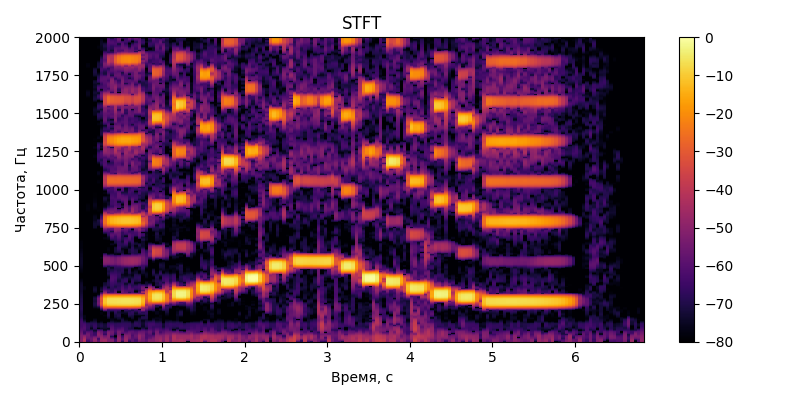

In [119]:
from IPython.display import Audio

fs, x = scipy.io.wavfile.read('clarinet_minor.wav')
if len(x.shape)==2:
    x=x[:, 0]
print(len(x)/fs)
Audio('clarinet_minor.wav')

print(x.shape)

M = 4000
L = 2000
nfft = 2**14

plt.figure(figsize=[8, 4], dpi=100)
f, t, Zxx = signal.stft(x, fs=fs, window=('flattop'), nperseg=M, noverlap=L, nfft=nfft)
plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx))), vmin=-80, cmap=plt.get_cmap('inferno'), shading='flat')
plt.colorbar()
plt.ylim((0, 2000))
plt.title('STFT')
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()

print("Разрешение по времени:", (M - L)/fs)
print("Кол-во кадров:", 3.673469387755102/((M - L)/fs))
print("Разрешение по частоте:", fs/nfft)

## Задача 3.2. Спектрограмма ЛЧМ сигнала. 

| Варианты: | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$f_0$, Гц | 170| 80 | 90 | 75 | 120 | 130 | 85 | 95 | 70 | 65 | 110 | 105 |
|$f_1$, Гц | 800 | 900 | 850 | 870 | 820 | 875 | 780 | 810 | 790 | 825 | 830 | 840 |

Постройте спектрограмму c окном Блэкмана для ЛЧМ-сигнала длительностью $T=2$ секундам, мгновенная частота которого изменяется от $f_0$ до $f_1$, частота дискретизации $f_s=2000$ Гц. Начальный размер кадра (`nperseg`) выберите $H=512$ отсчетов. Пронаблюдайте, как изменяется спектрограмма при изменении следующих параметров:
* тип оконной функции (`window`),
* длина кадра (`nperseg`),
* размерность ДПФ (`nfft`).

Text(0.5, 0, '$f_n$, Гц')

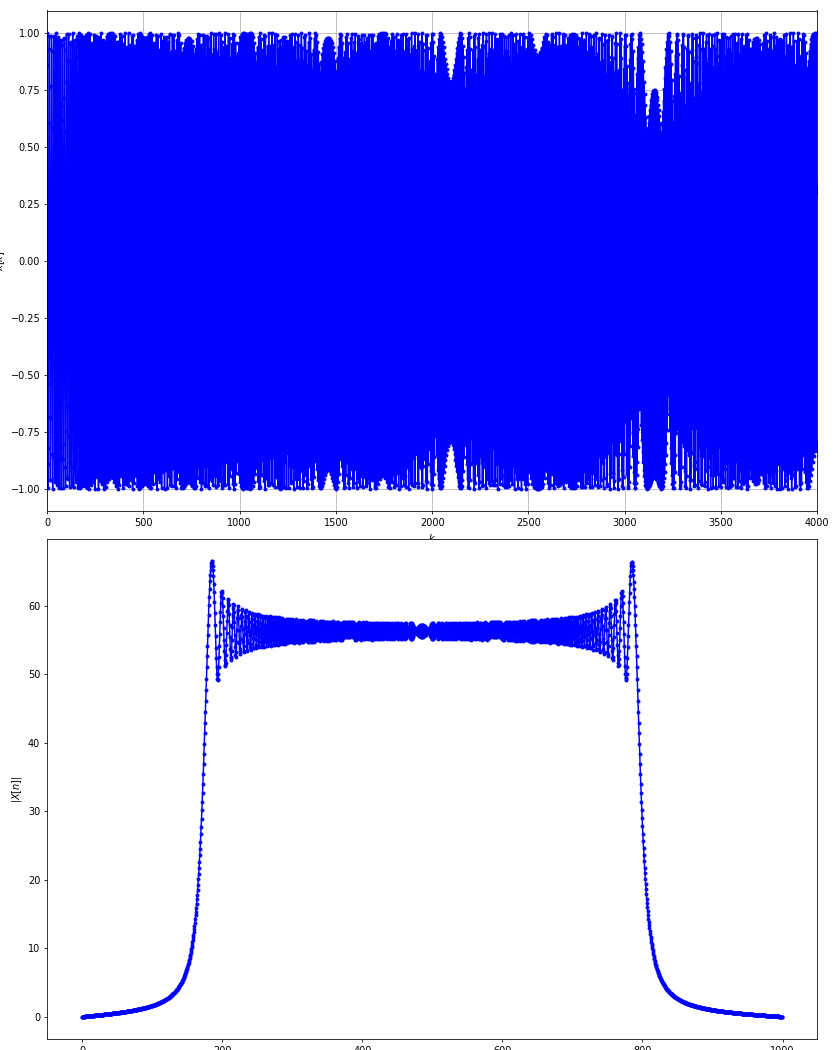

In [120]:
fs=2000
f0=170
f1=800
t=np.arange(0, 2, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

plt.figure(figsize=[12, 15], dpi=70)
nseg=5
nperseg=2000
noverlap=0
from matplotlib import gridspec
# gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])

plt.subplot(2, 1, 1)
plt.plot(np.arange(x.size), x, '.-b')
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(2, 1, 2)
X_n=np.fft.fft(x)
plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b')
plt.ylabel('$|X[n]|$')
plt.xlabel('$f_n$, Гц')

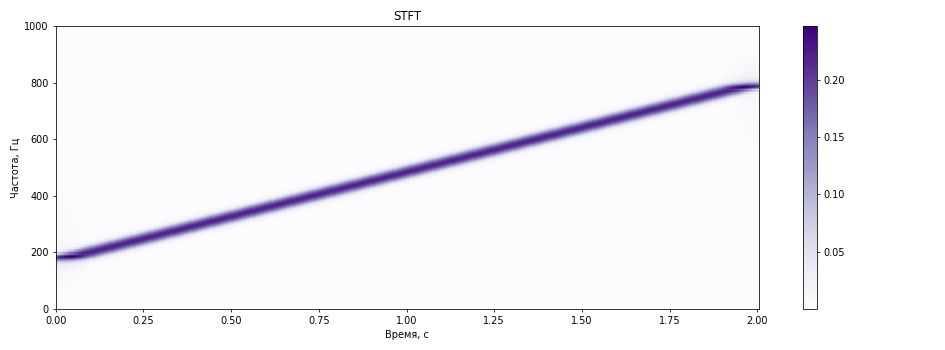

In [121]:
H = 512
L = 500
NFFT = 2**14
w = 'hann'

f, t, Zxx = signal.stft(x, fs=fs, window=(w), nperseg=H, noverlap=L, nfft=NFFT)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx[:-1, :-1]), cmap=plt.get_cmap('Purples'), shading='flat')
plt.colorbar()
plt.title('STFT')
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()
plt.show()

# Примеры вычислений на Python для лабораторной работы №3

## Обработка wav-файла 

Чтение звукового wav-файла можно провести с помощью функции `scipy.io.wavfile.read`. На вход она принимает первым параметром (и единственным обязательным) адрес файла, который требуется декодировать. Функция возвращает частоту дискретизации в Гц (`fs`) и (`x`) - массив отсчетов. В случае монозаписи (одноканальной) массив `x` одномерный, а у случае стереозаписи (двуканальной) —  двумерный, где номера строк соответствуют разным каналам записи, а номера столбцов – индексам отсчетов. 

Цифровой сигнал является одновременно и дискретизованным по времени, и квантованным по уровню. Поэтому каждый отсчет кодируется заданным числом бит, определяемым типом данных для элементов массива `x`. Например, для `int16` один отсчет занимает 16 бит (16 двоичных разрядов), а число уровней квантования $2^{16}$. 

In [122]:
import scipy.io.wavfile
import numpy as np
fs, x = scipy.io.wavfile.read('cello4.wav')
print("Частота дискретизации %.0f Гц" %fs)
print("Тип данных", x.dtype)
print("Размер массива", x.shape)
print("Число отсчетов записи", x.shape[0])

Частота дискретизации 44100 Гц
Тип данных int16
Размер массива (420237,)
Число отсчетов записи 420237


Воспроизведем звукозапись. 

In [ ]:
from IPython.display import Audio
Audio('./cello4.wav')

Если запись двуканальная, возьмем в рассмотрение только один канал.

In [ ]:
if len(x.shape)==2:
    x=x[:, 0]

Построим график сигнала во временной области. Для выделения фрагмента можно использовать функцию `plt.xlim` или инструменты zoom и pan (при backend notebook). Для использования zoom нужно выделить прямоугольником область графика, которую требуется рассмотреть. Для использования pan при нажатой левой кнопке мыши график можно перемещать, а нажатой правой кнопке мыши — изменять масштаб по осям. 
* `np.arange(x.size)/fs` — массив отсчетов во времени $k\Delta t = k/f_д$, $k=0,\;1,\; \dots, N-1$, $N$ — число отсчетов сигнала.

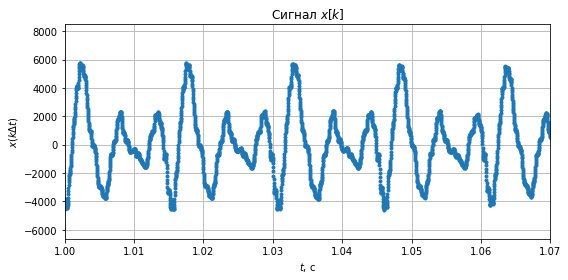

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 4]) # размер полотна
plt.plot(np.arange(x.size)/fs, x, '.') # график сигнала (точками)
plt.grid() # сетка 
plt.xlim([1, 1.07]) # Выделение фраграмента от 1 с до 1,07 с
plt.title("Cигнал $x[k]$") # заголовок графика
plt.xlabel("$t$, c") # подпись оси абсцисс
plt.ylabel("$x(k\Delta t)$") # подпись оси ординат
plt.tight_layout()
plt.show()

Оценим спектр исходного сигнала с помощью ДВПФ для выборок сигнала $\Delta t x(k\Delta t)$ (`x/fs`). Связь между спектрами аналогового сигнала и цифрового в данном случае:
$$X_д (f) =  \sum_{m=-\infty}^{\infty} X_а(f+m f_д )$$

* Если пренебречь эффектом наложения спектров, то на интервале $[-f_д/2; \; f_д/2]$ выполняется $X_а (f) \approx X_д(f) $. 

* Тогда можно построить оценку спектра $$\hat{X}_а (f) = X_д(f)\;\; при \;\; f\in[-f_д/2; \; f_д/2].$$ Вычислим ее в `Nfft` точках, равномерно расположенных на полуинтервале  $[-f_д/2; \; f_д/2)$.

* Поскольку правый конец полуинтервала (точка $f_д/2$) не включается, при задании частот нужно указать `endpoint=False`. 

* ДВПФ в этих точках вычислим с помощью ДПФ (`scipy.fft.fft` или `np.fft.fft`). 

* Чтобы перенести отсчеты ДПФ c полуинтервала $[0, f_д)$ на полуинтервал $[-f_д/2; \; f_д/2)$  используем функцию `scipy.fft.fftshift` или `np.fft.fftshift`.

* Определим размерность ДПФ `Nfft` как наибольшее из двух: $2^{19}$ и результата работы функции `scipy.fft.next_fast_len` для длины последовательности. Функция `scipy.fft.next_fast_len` определить следующую размерность ДПФ, для которой вычисления по алгоритму быстрого преобразования Фурье проходят эффективно. 

In [ ]:
import scipy.fft
Nfft=max(scipy.fft.next_fast_len(x.size), 2**19) 
f, Xf = np.linspace(-0.5*fs, 0.5*fs, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(x/fs, Nfft))

In [ ]:
print("Размерность ДПФ", Nfft) 

Размерность ДПФ 524288


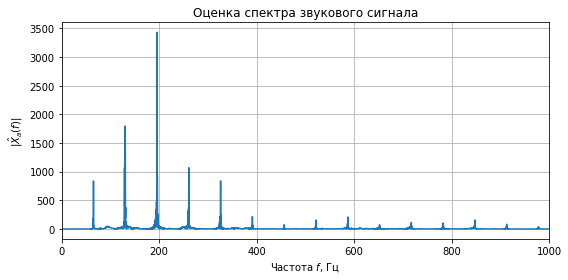

In [ ]:
plt.figure(figsize=[8, 4])
plt.title("Оценка спектра звукового сигнала")
plt.plot(f, abs(Xf), '-')
plt.xlim([0, 1000])
plt.grid()
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|\hat{X}_a(f)|$")
plt.tight_layout()
plt.show()

Пример анализа графика: во временной области мы можем наблюдать повторение через  

In [ ]:
print("%.3f c" % (1.00214-0.98680))

0.015 c


Такому периоду соотвествует частота 

In [ ]:
print("%.3f Гц" % (1/(1.00214-0.98680)))

65.189 Гц


Примерно на этой частоте мы наблюдаем первую гармонику в спектре сигнала. 

## Распознование сигнала с помощью ДПФ

Определим ДПФ сигнала из $N=64$ точек 
$$x[k] = \sin \left(2\pi  \dfrac{12}{N} k\right) + 2 \sin \left(2\pi  \dfrac{18}{N} k +\dfrac{\pi}{3}\right)$$

In [ ]:
N=64
k=np.arange(N)
x=np.sin(2*np.pi*k*12/N)+2*np.sin(2*np.pi*k*18/N+np.pi/3)

В теоретической части работы рассматривался пример задачи спектрального анализа по обнаружению и оцениванию параметров сигнала. Пусть обрабатываемая последовательность имеет вид
$$x[k]=\sum\limits_{m=1}^{M}{{{A}_{m}}}\sin (2\pi \frac{m}{N}k+{{\varphi }_{m}}),\quad k=0,\ 1,\ 2,\ \ldots ,\ N-1,$$
где ${{A}_{m}}$ и ${{\varphi }_{m}}$ – неизвестные заранее амплитуды и фазы гармонических составляющих; $m$– неизвестные заранее целые числа, определяющие нормированные частоты ${{\nu }_{m}}=m/N$ гармонических составляющих, которые совпадают с бинами ДПФ. Для определения ${{A}_{m}}$ и ${{\varphi }_{m}}$ в этом случае достаточно вычислить ДПФ последовательности: 
	$$\tilde{X}[n]=\frac{1}{N}\sum\limits_{k=0}^{N-1}{x[k]}{{e}^{-j\frac{2\pi }{N}nk}}.$$
Неизвестные амплитуды и фазы определяются как
${{A}_{m}}=2\left| \tilde{X}[m] \right|;\quad {{\varphi }_{m}}=\arg \tilde{X}[m]+\pi /2,\ \ m\in \left[ 0,\ \frac{N}{2}-1 \right]$


Для расчетов удобно сразу взять формулу ДПФ с нормировкой на число отсчетов:

In [ ]:
Xn=np.fft.fft(x)/N

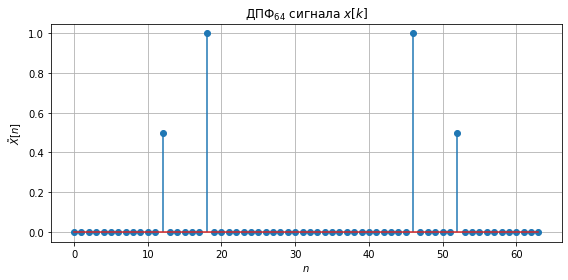

In [ ]:
plt.figure(figsize=[8, 4])
plt.title("ДПФ$_{%i}$ сигнала $x[k]$" %N)
plt.stem(np.arange(Xn.size), abs(Xn))
plt.ylabel("$\\tilde{X}[n]$")
plt.xlabel("$n$")
plt.tight_layout()
plt.grid()
plt.show()

На левой половине периода ненулевыми являются отсчеты ДПФ $n=12$ и $n=18$.

$$x[k]=A_{12} \sin \left(2\pi \dfrac{12}{64}k+{{\varphi }_{12}} \right) + A_{18} \sin \left(2\pi \dfrac{18}{64}k+{{\varphi }_{18}} \right),\quad k=0,\ 1,\ 2,\ \ldots ,\ 63.$$

Остается опредлить неизвестные амплитуды и фазы $A_{12}$, $A_{18}$, ${\varphi }_{12}$, ${\varphi }_{18}$. 

$A_{12}$

In [ ]:
2*abs(Xn[12])

1.0000000000000007

$A_{18}$

In [ ]:
2*abs(Xn[18])

1.999999999999999

${\varphi }_{12}$

In [ ]:
phi_12 = np.angle(Xn[12])+(np.pi/2)
phi_12

-1.5543122344752192e-15

${\varphi }_{18}$

In [ ]:
phi_18 = np.angle(Xn[18])+(np.pi/2)
phi_18

1.0471975511965972

${\varphi }_{18}$ сооставляет $1/3$ от $\pi$.

In [ ]:
phi_18/np.pi

0.33333333333333315

Оценка сигнала

$$x[k] = \sin \left(2\pi  \dfrac{12}{N} k\right) + 2 \sin \left(2\pi  \dfrac{18}{N} k +\dfrac{\pi}{3}\right)$$

## Оконные функции

`scipy.signal.get_window(window, Nx, fftbins=True)` Возвращает отсчеты оконной функции заданного типа и длины. 

**Parameters:**

`window` *string, float, or tuple* Тип оконной функции. 
* ***string***  Если окно непараметрическое (например, `boxcar`, `blackman`, `hamming`, `hann`, `bartlett`, `flattop`), то `window` — название окна (строка).

Название окна | Прямоугольное| Блэкмана|Хемминга| Ханна| Бартлета | С плоской вершиной
:----:  | :----:  | :----:    | :----:  | :----:| :----:    |  :----:   
***string*** | `boxcar`| `blackman`|`hamming`| `hann`| `bartlett`| `flattop`


* ***tuple*** Если окно параметрическое, то окно задается кортежем, где нулевой элемент — название окна (строка), а последующие элементы - параметры окна. Например, `('chebwin', 13)` — окно Чебышёва с уровнем боковых лепестков 13 дБ относительно главного, `('kaiser', 5)` — окно Кайзера с параметром $\beta=5$. 
Название окна | Кайзера| Чебышёва |
:----:  | :----:  | :----:    |
 ***tuple*** | `(kaiser, beta)` | `(chebwin, attenuation)`|
* ***float***  Для случая окна Кайзера можно сразу указать значение $\beta$ в параметр `window`.  Запись `window = 5` эквивалентна `window = ('kaiser', 5)`






`Nx` *int* Длина окна. 

`fftbins` *bool, optional* Если параметр равен `True` (по умолчанию), то создается окно для ДПФ, если `False` — симметричное на интервале $[0, N_x-1]$ окно, используемое для синтеза КИХ-фильтров.


**Returns:**

`get_window` *ndarray* Одномерный массив отсчетов окна длины `Nx`.

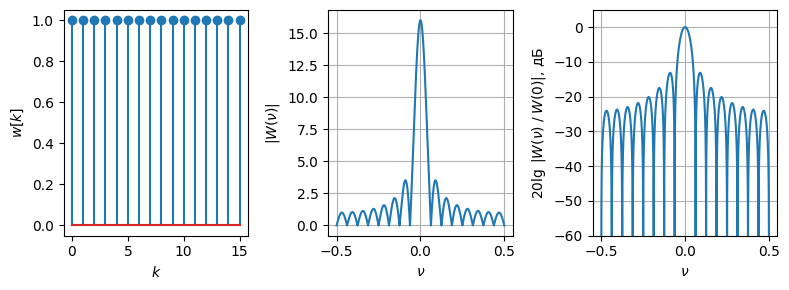

In [ ]:
plt.figure(figsize=[8, 3], dpi=100)
Nfft=2**18

N = 16
w = signal.get_window('boxcar', N)
# w = signal.get_window(('kaiser', 5), N)
# w = signal.get_window(5, N)
# w = signal.get_window(('chebwin', 13), N, fftbins=False)
k = np.arange(N)
nu, W = np.linspace(-0.5, 0.5, num=Nfft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, Nfft))

plt.subplot(1, 3, 1)
plt.stem(k, w)
plt.xlabel('$k$')
plt.ylabel('$w[k]$')


plt.subplot(1, 3, 2)
k=np.arange(N)
plt.plot(nu, abs(W))
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.grid()


plt.subplot(1, 3, 3)
k=np.arange(N)
with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
    plt.plot(nu, 20*np.log10(abs(W)/max(abs(W))))
plt.ylim(ymin=-60)
plt.grid()
plt.xlabel('$\\nu$')
plt.ylabel('$20 \lg \; |W(\\nu)\; / \;W(0)|$, дБ')
plt.tight_layout()

## Взвешивание сигнала оконной функцией

### Пример 1. Различимость спектральных компонент.

Рассмотрим 64-точечный сигнал ($k=0,\;1,\;\dots, 63$)
$$x[k]=\sin\left( 2 \pi k \dfrac{11}{64}\right)+\sin\left( 2 \pi k \dfrac{13}{64}\right).$$
* Пример ниже показывает, что в случае прямоугольного окна (`w = signal.get_window('boxcar', N)`) спектральные компоненты вблизи частот $\nu_1={11}/{64}$ и  $\nu_2={13}/{64}$ различимы в ДВПФ. 
* Если выбрать окно Блэкмана(`w = signal.get_window('blackman', N)`) или окно Кайзера с параметром $\beta=8$ (`w = signal.get_window(('kaiser', 8), N)`), то эти спектральные компоненты неразличимы в ДВПФ.
* Если спектральные компоненты неразличимы в ДВПФ, то невозможно подобрать такую размерность ДПФ (`N_dft`), чтобы они оказались различимы в ДПФ. В противном случае это возможно. 

<IPython.core.display.Javascript object>


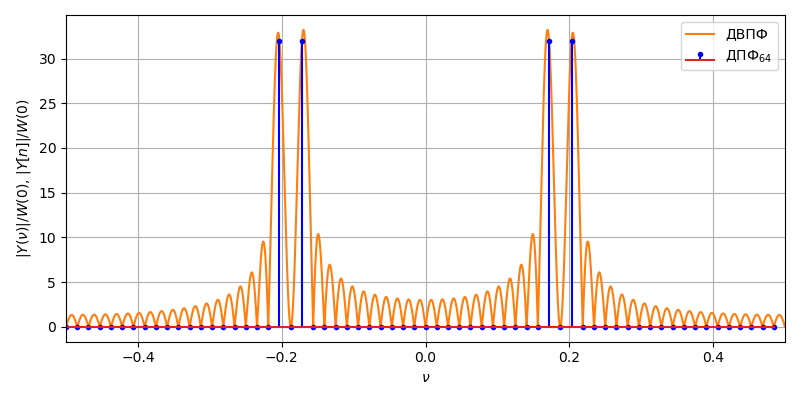

In [ ]:
N=64
N_dtft=2**14
N_dft=64
k=np.arange(N)
x=np.sin(2*np.pi*k*11/N)+np.sin(2*np.pi*k*13/N)

w = signal.get_window('boxcar', N)
# w = signal.get_window('blackman', N)
# w = signal.get_window(('kaiser', 8), N)
# w = signal.get_window('flattop', N)
y = x * w # Взвешивание сигнала оконной функцией
W0 = sum(w)

nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft), 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft), linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$|Y(\\nu)|/W(0)$, $|Y[n]|/W(0)$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

### Пример 2. Амплитудная модуляция спектра.
Рассмотрим 32-точечный сигнал ($k=0,\;1,\;\dots, 31$)
$$x[k]=\cos\left( 2 \pi k \dfrac{9.5}{32}\right)=\frac{1}{2}\exp\left({j2 \pi k \dfrac{9.5}{32}}\right)+\frac{1}{2}\exp\left({-j2 \pi k \dfrac{9.5}{32}}\right)$$
* Пусть $y[k]=x[k]w[k]$, где $w[k]$ — некоторое окно. ДВПФ сигнала $y[k]$ 
$$Y(\nu)=\dfrac{1}{2} W\left(\nu- \dfrac{9.5}{32} \right)+\dfrac{1}{2} W\left(\nu+ \dfrac{9.5}{32} \right).$$
Чтобы высоты максимумов на графике ДВПФ соответствовали амплитудам гармоник, нужно нормировать ось ординат на $W(0)$.
* Если выбрать прямоугольное окно, `w = signal.get_window('boxcar', N)`, то оценки амплитуд, получаемые с помощью ДПФ$_{32}$, ,будут отличаться от истинных значений на $-3,92$ дБ (значение коэффициента паразитной амплитудной модуляции). 
* Результат можно исправить, дополняя сигнал нулевыми отсчетами и увеличивая размерность ДПФ. 
* Без изменения размерности ДПФ лучшего результата можно добиться с помощью окна с плоской вершиной `w = signal.get_window('flattop', N)`.
* В реальности часто частоты гармоник неизвестны. Поэтому для оценки амплитуд используются окна с низким коэффициентом паразитной амплитудной модуляции (например, flattop-окно).

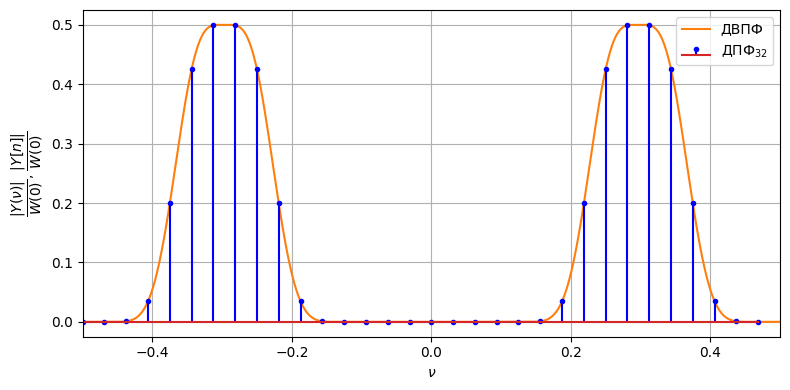

In [ ]:
N=64
N_dtft=2**14
N=32
N_dft=32
k=np.arange(N)
x=np.cos(2*np.pi*9.5/N*k)

# w = signal.get_window('boxcar', N)
# w = signal.get_window('blackman', N)
# w = signal.get_window(('kaiser', 8), N)
w = signal.get_window('flattop', N)
y = x * w
W0 = sum(w)


nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(y, N_dft))


plt.figure(figsize=[8, 4], dpi=100)
plt.plot(nu_dtft, abs(X_dtft)/W0, 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft)/W0, linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$\dfrac{|Y(\\nu)|}{W(0)}$, $\dfrac{|Y[n]|}{W(0)}$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

## Кратковременное дискретное преобразование Фурье (STFT)

Кратковременное дискретное преобразование Фурье (Discrete  STFT, англ. Discrete Short-time Fourier transform) можно задать формулой
$${{X}_{m}}[n]=\sum\limits_{k=mR}^{mR+M-1}{x}[k]w[k-mR]\exp \left( -j2\pi \frac{nk}{{{N}_{\text{FFT}}}} \right),$$
где 
* $w[k]$ — временное окно, 
* $m$ — порядковый номер сегмента, 
* $M$ — длина окна (сегмента), 
* ${{N}_{\text{FFT}}}$ – размерность ДПФ, 
* $R=M-L$ – единичный сдвиг окна, 
* $L$ — размер перекрытия. 

Это преобразование позволяет осуществлять ДПФ-анализ на коротких интервалах времени. Для графического отображения результатов данного преобразования часто используется представление в виде графика с двумя осями, где по горизонтальной оси отображается время (или номер кадра $m$), по вертикальной — соответствующие частоты, а цветом отображается $|{{X}_{m}}[n]|$, $|{{X}_{m}}[n]{{|}^{2}}$ (в случае спектрограммы), или фазовая часть ${{X}_{m}}[n]$.


### Функция scipy.signal.stft

`scipy.signal.stft(x, fs=1.0, window='hann', nperseg=256, noverlap=None, nfft=None, detrend=False, return_onesided=True, boundary='zeros', padded=True, axis=-1, scaling='spectrum')` Расчет кратковременного дискретного преобразования Фурье (STFT)

**Основные параметры:**

`x` *array_like* Отсчеты сигнала. 

`fs` *float, optional* Частота дискретизации. 

`window` *str or tuple or array_like, optional* Используемое окно. Задается в виде параметров для функции `get_window` (без указания длины) или в виде массива отсчетов окна. По умолчанию генерируется окно Ханна. 

`nperseg` *int, optional* Длина сегмента $M$ (длина окна). По умолчанию 256.

`noverlap` *int, optional* Число точек в перекрытии $L$. По умолчанию, используется 50% перекрытие. 

`nfft` *int, optional* Размерность ДПФ сегментов.

Описание параметров `detrend`, `return_onesided`, `boundary`, `padded` , `axis`, `scaling: {‘spectrum’, ‘psd’}` можно найти в API reference SciPy. 

**Returns:**
`f` *ndarray* Массив частот спектрограммы.

`t` *ndarray* Массив времен спектрограммы.

`Zxx` *ndarray* Значения STFT.

### Пример построения спектрограммы

In [ ]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
import scipy.io.wavfile
from IPython.display import Audio

fs, x = scipy.io.wavfile.read('vibraphone-loop-1.wav')
if x.shape[1]>1:
    x=x[:, 0] # берем левый канал в случае, если wav-файл — стереозапись 
Audio('./vibraphone-loop-1.wav')

FileNotFoundError: [Errno 2] No such file or directory: 'vibraphone-loop-1.wav'

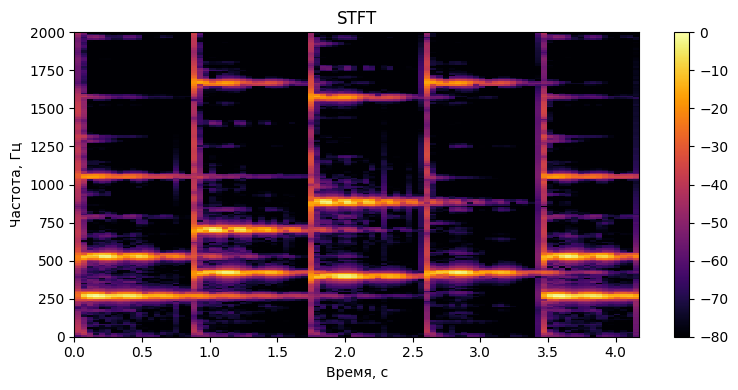

In [ ]:
plt.figure(figsize=[8, 4], dpi=100)
f, t, Zxx = signal.stft(x, fs=fs, window=('hann'), nperseg=4000, noverlap=2000, nfft=2**12)
plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx))), vmin=-80, cmap=plt.get_cmap('inferno'), shading='flat')
plt.colorbar()
plt.ylim((0, 2000))
plt.title('STFT')
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()

Разрешение по времени для STFT равно длине единичного сдвига окна в секундах, т.е. $R/{{f}_{\text{s}}}$. 

Разрешение по частоте обусловлено двумя параметрами.

* Сеткой частот ДПФ $\Delta f={{f}_{\text{s}}}/{{N}_{\text{FFT}}}$, где ${{N}_{\text{FFT}}}$— размерность ДПФ. Это разрешение можно улучшить без изменения длины кадра — путем добавления нулевых отсчетов. 

* Шириной главного лепестка оконной функции. Как правило, этот параметр зависит от длины окна $M.$


###  Проверка условий COLA(R) и NOLA(R)

По опредлению, окно $w[k]$ обладает свойством COLA(R), если 
$\underset{m=-\infty }{\overset{\infty }{\sum }}\,w[k-mR]=const \ \forall k\in \mathbf{Z}$.

In [ ]:
from scipy import signal
signal.check_COLA(window=signal.get_window('hann', 4000), nperseg=4000, noverlap=2000)

True

По опредлению, окно $w[k]$ обладает свойством NOLA(R), если 
$\underset{m=-\infty }{\overset{\infty }{\sum }}\,w[k-mR]^2 \neq 0\ \forall k\in \mathbf{Z}$.

In [ ]:
signal.check_NOLA(window=signal.get_window('hann', 4000), nperseg=4000, noverlap=2000)

True

### Вычисление обратного преобразования

Вычисление обратного преобразования можно провести с помощью функции `scipy.signal.istft`.

In [ ]:
t1, x1 =  signal.istft(Zxx, fs=fs, window=('hann'), nperseg=4000, noverlap=2000, nfft=2**12)
x1

array([-9.09494702e-10,  4.54747126e-09, -3.63801471e-09, ...,
        6.82084419e-10,  1.25055381e-09,  4.54747631e-10])

### Пример. Формирование спектрограммы  ЛЧМ - сигнала

Рассмотрим сигнал, частота которого изменяется по линейному закону:

$$f(t) = f_0 + (f_1 - f_0) t / t_1$$

In [ ]:
fs=500
f0=1
f1=80
t=np.arange(0, 2, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

Формирование спектрограммы  ЛЧМ - сигнала без перекрытия сегментов. 

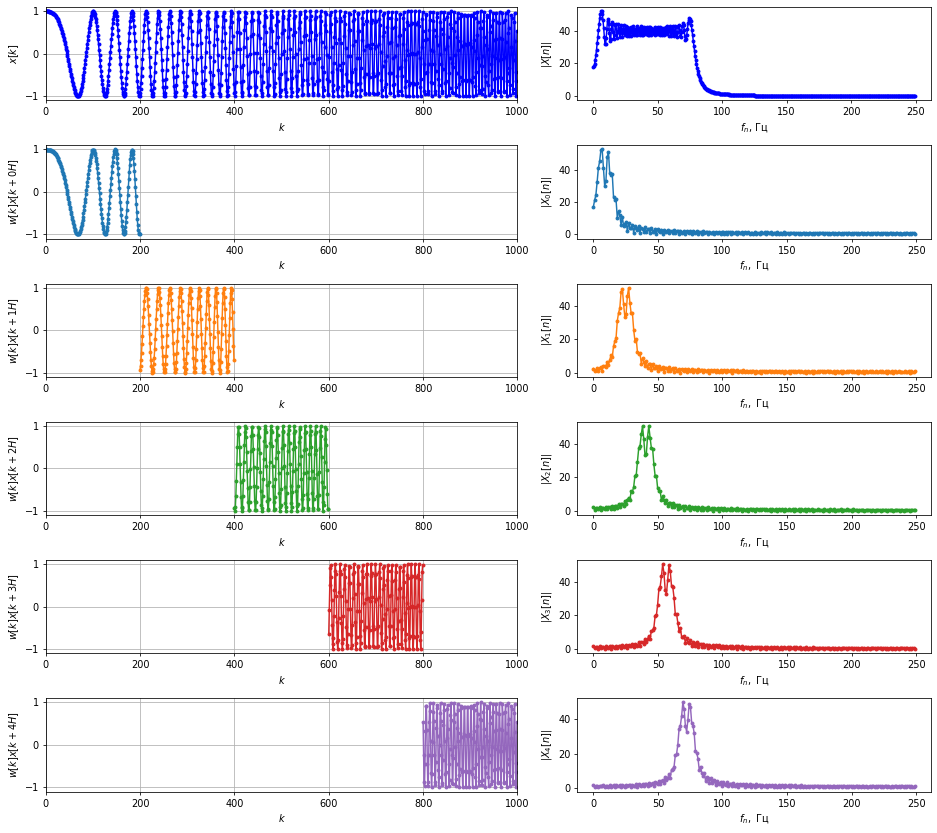

In [ ]:
plt.figure(figsize=[13.5, 12], dpi=70)
nseg=5
nperseg=200
noverlap=0
from matplotlib import gridspec
gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])

plt.subplot(gs[0])
plt.plot(np.arange(x.size), x, '.-b')
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(gs[1])
X_n=np.fft.fft(x)
plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b')
plt.ylabel('$|X[n]|$')
plt.xlabel('$f_n$, Гц')

for u in range(nseg):
    plt.subplot(gs[u*2+2])
    y=x[(nperseg-noverlap)*u:(nperseg-noverlap)*u+nperseg]*signal.windows.boxcar(nperseg, sym=False)
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), y, '.-C%i' %u)
    plt.xlim([0, x.size])
    plt.ylabel('$w[k]x[k+%iH]$' %u)
    plt.xlabel('$k$')
    plt.grid()
    plt.yticks([-1, 0, 1])
    plt.tight_layout()
    
    plt.subplot(gs[u*2+3])
    X_n=np.fft.fft(y, 512)
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-C%i'  %u)
    plt.ylabel('$|X_{%i}[n]|$' %u)
    plt.xlabel('$f_n,$ Гц')
    plt.tight_layout()

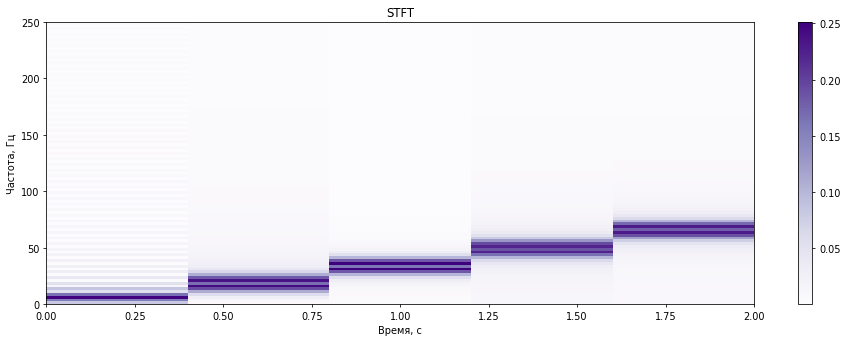

In [ ]:
f, t, Zxx = signal.stft(x, fs=fs, window=('boxcar'), nperseg=200, noverlap=0, nfft=200)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx[:-1, :-1]), cmap=plt.get_cmap('Purples'), shading='flat')
plt.colorbar()
plt.title('STFT')
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()
plt.show()

Формирование спектрограммы  ЛЧМ - сигнала с перекрытием сегментов 50%. 

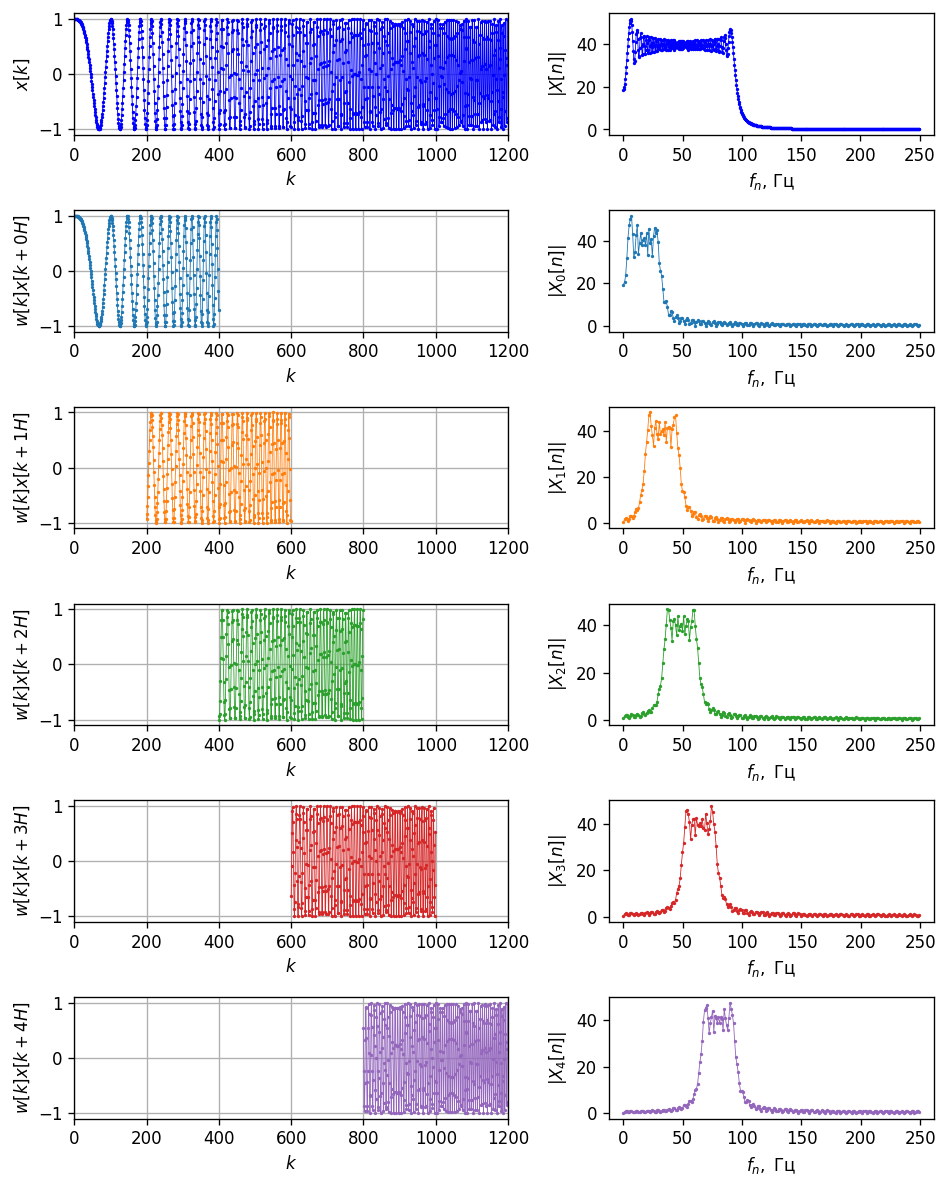

In [ ]:
plt.figure(figsize=[8, 10], dpi=120)
fs=500
f0=1
f1=80
t=np.arange(0, 2.4, 1/fs)
x = signal.chirp(t, f0=f0, f1=f1, t1=2, method='linear')

nseg=5
nperseg=400
noverlap=200
from matplotlib import gridspec
gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])
linewidth=0.5
ms=2
plt.subplot(gs[0])
plt.plot(np.arange(x.size), x, '.-b', linewidth=0.5, ms=ms)
plt.xlim([0, x.size])
plt.tight_layout()
plt.grid()
plt.ylabel('$x[k]$')
plt.xlabel('$k$')

plt.subplot(gs[1])
X_n=np.fft.fft(x)
plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b', linewidth=linewidth, ms=ms)
plt.ylabel('$|X[n]|$')
plt.xlabel('$f_n$, Гц')

for u in range(nseg):
    plt.subplot(gs[u*2+2])
    y=x[(nperseg-noverlap)*u:(nperseg-noverlap)*u+nperseg]*signal.windows.boxcar(nperseg, sym=False)
    plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u+nperseg), y, '.-C%i' %u, linewidth=linewidth, ms=ms)
    plt.xlim([0, x.size])
    plt.ylabel('$w[k]x[k+%iH]$' %u)
    plt.xlabel('$k$')
    plt.grid()
    plt.yticks([-1, 0, 1])
    plt.tight_layout()
    
    plt.subplot(gs[u*2+3])
    X_n=np.fft.fft(y, 512)
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-C%i'  %u, linewidth=linewidth, ms=ms)
    plt.ylabel('$|X_{%i}[n]|$' %u)
    plt.xlabel('$f_n,$ Гц')
    plt.tight_layout()

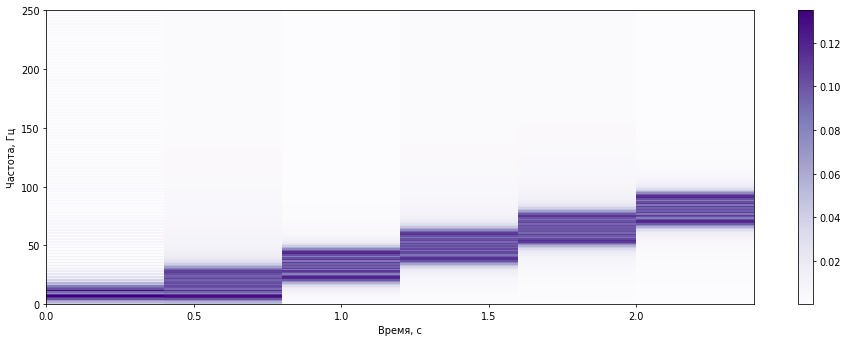

In [ ]:
f, t, Zxx = signal.stft(x, fs=fs, window=('boxcar'), nperseg=400, noverlap=200, nfft=400)
plt.figure(figsize=[13.5, 5], dpi=70)
plt.pcolormesh(t, f, np.abs(Zxx[:-1, :-1]), cmap=plt.get_cmap('Purples'), shading='flat')
plt.colorbar()
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()

### Пример. Влияние выбора окна. 

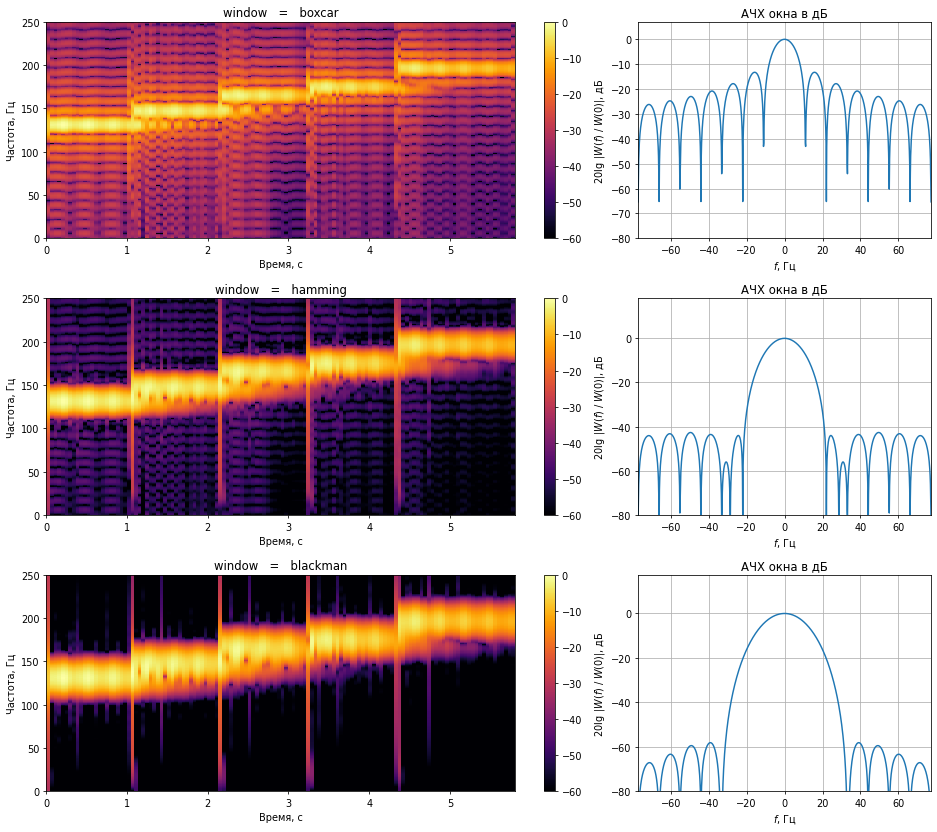

In [ ]:
import scipy.io.wavfile
fs, x = scipy.io.wavfile.read('vibraphone-scale.wav')
x=x[:, 0]
N_dtft=2**18

windows=['boxcar', 'hamming', 'blackman']
gs = gridspec.GridSpec(len(windows), 2, width_ratios=[8, 4])
u=0
plt.figure(figsize=[13.5, 12], dpi=70)
for window in windows: #'bartlett', 'hann', 
    plt.subplot(gs[u*2], title='window   =   %s' % (window))
    nperseg=4000
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, nfft=2**16)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 250))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()
    plt.subplot(gs[u*2+1], title='АЧХ окна в дБ')
    w=signal.windows.get_window(window, Nx=nperseg)
    f, W = np.linspace(-fs/2, fs/2, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, N_dtft))
    with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
        plt.plot(f, 20*np.log10(abs(W)/max(abs(W))))
    plt.ylim(ymin=-80)
    plt.xlim([-7*fs/nperseg, 7*fs/nperseg])
    plt.grid()
    plt.xlabel('$f$, Гц')
    plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')
    plt.tight_layout()
    u+=1   

In [ ]:
import scipy.io.wavfile
fs, x = scipy.io.wavfile.read('vibraphone-scale.wav')
x=x[:, 0]
N_dtft=2**18

window='hann'

gs = gridspec.GridSpec(len(windows), 2, width_ratios=[8, 4])
u=0
plt.figure(figsize=[13.5, 12], dpi=70)
for nperseg in [2000, 4000, 10000]: 
    plt.subplot(gs[u*2], title='Длина окна  $M=%s$' % (nperseg))
    noverlap=nperseg//2
    f, t, Zxx = signal.stft(x, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap, nfft=2**16)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx))), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 250))
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()
    plt.subplot(gs[u*2+1], title='АЧХ окна в дБ')
    w=signal.windows.get_window(window, Nx=nperseg)
    f, W = np.linspace(-fs/2, fs/2, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, N_dtft))
    with np.errstate(divide='ignore'): # Отключаем RuntimeWarning
        plt.plot(f, 20*np.log10(abs(W)/max(abs(W))))
    plt.ylim(ymin=-120)
    plt.xlim([-200, 200])
    plt.grid()
    plt.xlabel('$f$, Гц')
    plt.ylabel('$20 \lg \; |W(f)\; / \;W(0)|$, дБ')
    plt.tight_layout()
    u+=1   

FileNotFoundError: [Errno 2] No such file or directory: 'vibraphone-scale.wav'

# Задачи к допуску

## 1. a)

<IPython.core.display.Javascript object>


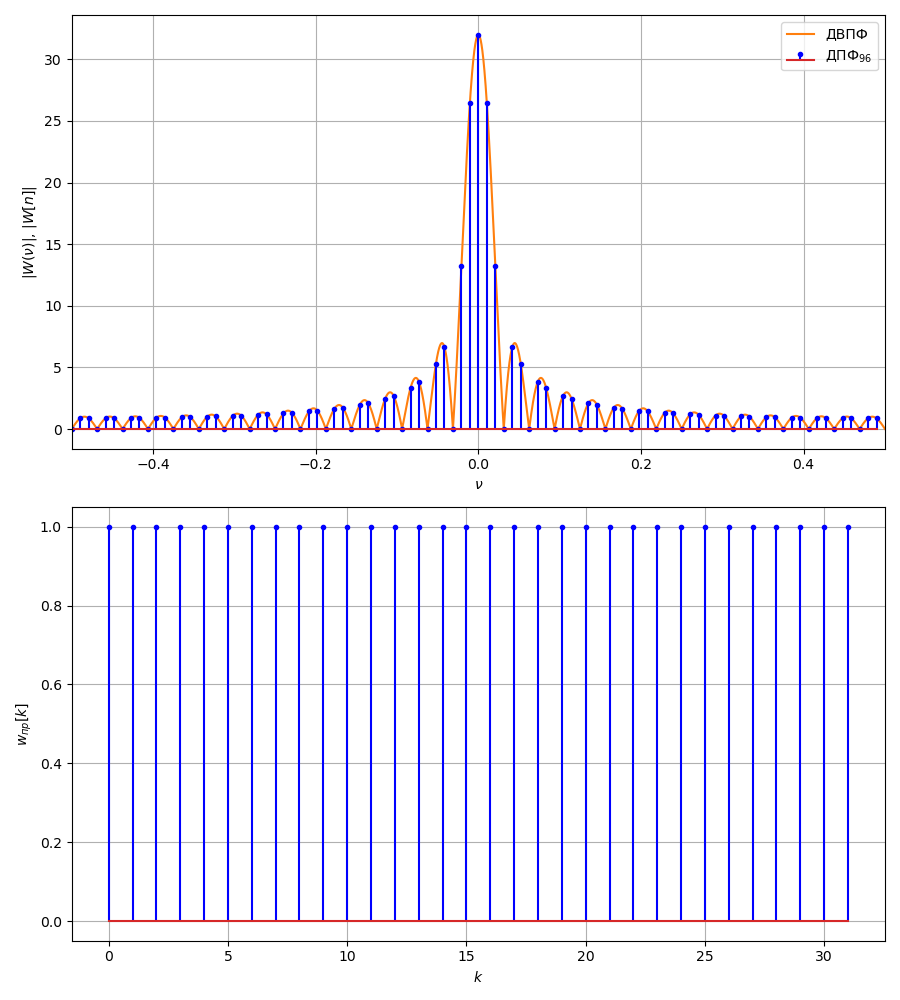

In [ ]:
N=32
N_dtft=2**14
N_dft=96
k=np.arange(N)

w = signal.get_window('boxcar', N)

nu_dtft, X_dtft = np.linspace(-0.5, 0.5, num=N_dtft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, N_dtft))
nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(w, N_dft))

plt.figure(figsize=[9, 10], dpi=100)
plt.subplot(2, 1, 1)
plt.plot(nu_dtft, abs(X_dtft), 'C1', label='ДВПФ')
plt.stem(nu_dft, abs(X_dft), linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$, $|W[n]|$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.stem(k, w, 'C1', linefmt='b', markerfmt='.b')
plt.xlabel('$k$')
plt.ylabel('$w_{пр}[k]$')
plt.grid()
plt.tight_layout()

## 4.

<IPython.core.display.Javascript object>


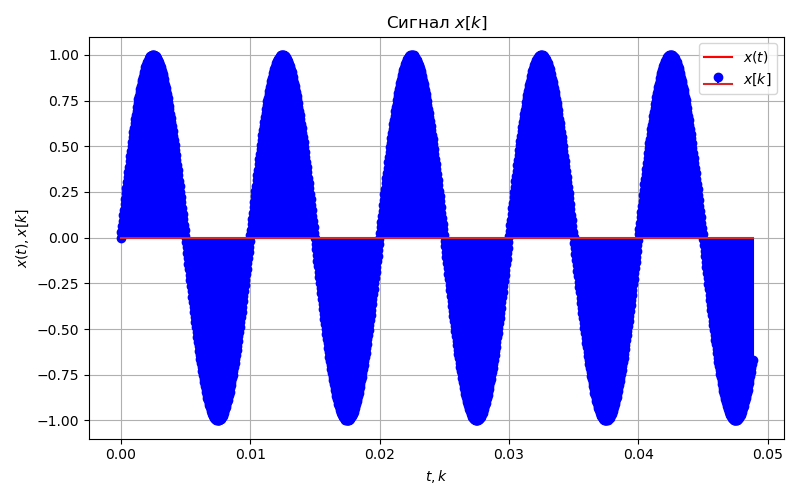

(1000,)


<IPython.core.display.Javascript object>


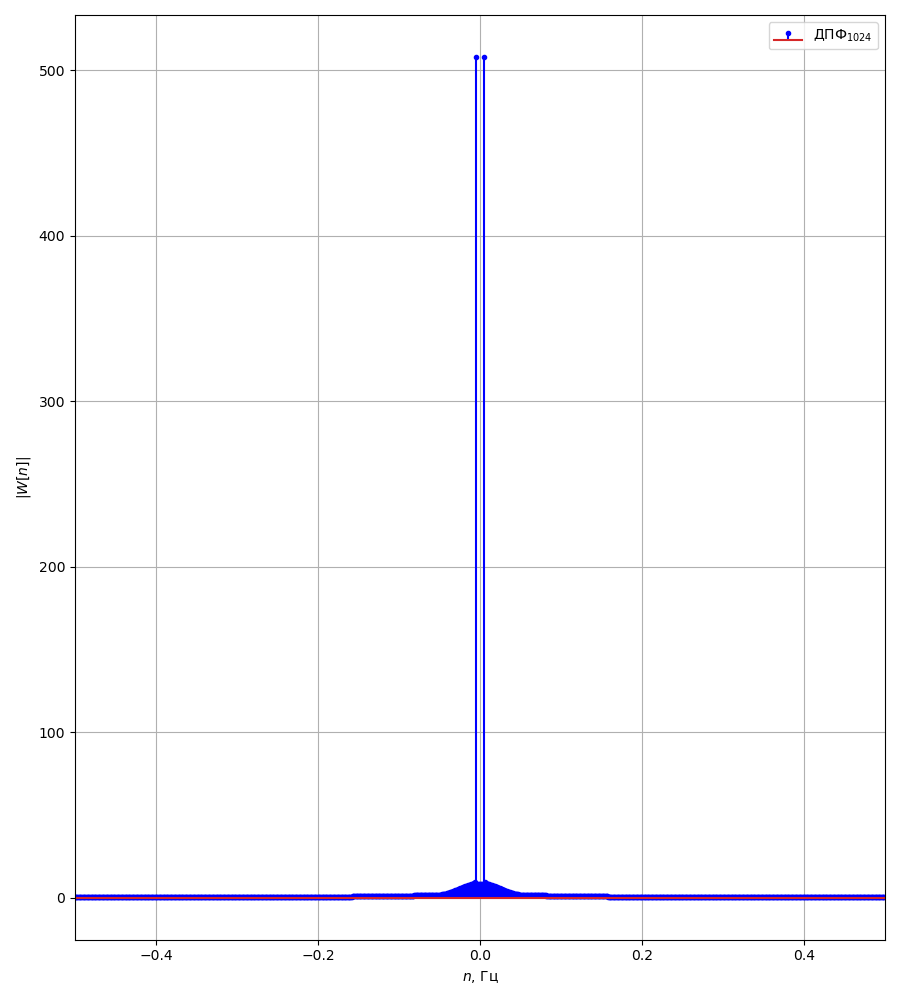

19.9999488


In [ ]:
N = 2**14
d = 1000
fd = 20480
N_dft = 1024

t = np.linspace(0, d/fd, N)
k = np.linspace(0, d/fd, d)
xt = np.sin(2 * np.pi * 100 * t)
xk = np.sin(2 * np.pi * 100 * k)

plt.figure(figsize=[8, 5])
plt.plot(t, xt, 'r', label='$x(t)$')
plt.stem(k, xk, 'b', label='$x[k]$')
print(np.shape(xk))
plt.title('Сигнал $x[k]$')
plt.xlabel('$t, k$')
plt.ylabel('$x(t), x[k]$')
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()

nu_dft, X_dft = np.linspace(-0.5, 0.5, num=N_dft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(xk, N_dft))

plt.figure(figsize=[9, 10], dpi=100)
plt.stem(nu_dft, abs(X_dft), linefmt='b', markerfmt='.b', label='ДПФ$_{%i}$' % N_dft)
plt.xlabel('$n$, Гц')
plt.ylabel('$|W[n]|$')
plt.xlim([-0.5, 0.5])
plt.legend()
plt.grid()
plt.tight_layout()

print(0.00097656*fd)

0.0005
0.042279537353515625 100 100.04227953735352
6.614999999999995


<IPython.core.display.Javascript object>


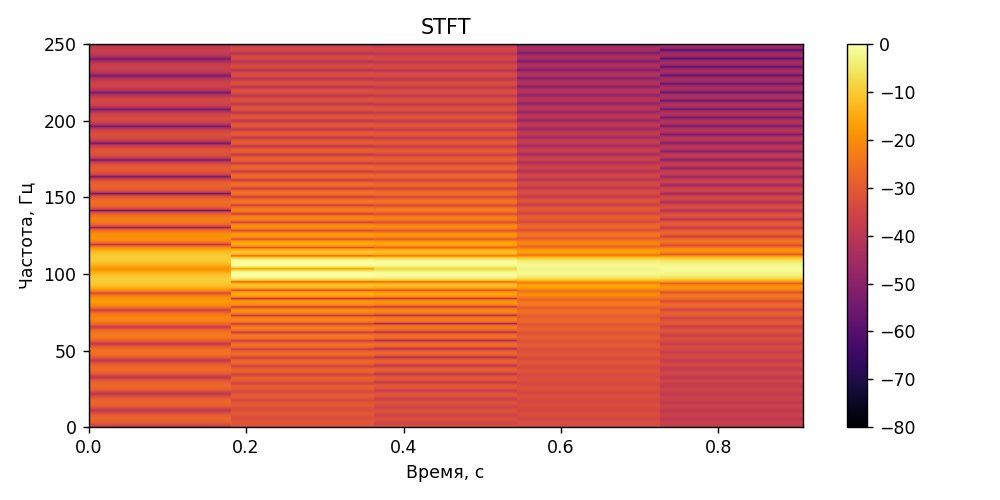

Разрешение по времени: 0.18140589569160998
Кол-во кадров: 20.25
Разрешение по частоте: 0.042057037353515625


In [ ]:
M = 8000
L = 0
N = 40000
fd = 44100
Nfft = 2**20
df = fd / Nfft + 0.89*2/M

f1 = f2 + 1.2*fd/M
print(4/M)
f2 = 100
print(df, f2, f2+df)
print(abs(f1-f2))
phi1, phi2 = np.pi, np.pi/2

w = 'boxcar'

ks = np.linspace(0, 40000, N)
xk = np.cos(2*np.pi*f1*ks/fd + phi1) + np.cos(2*np.pi*f2*ks/fd + phi2)

plt.figure(figsize=[8, 4], dpi=100)
f, t, Zxx = signal.stft(xk, fs=fd, window=w, nperseg=M, noverlap=L, nfft=Nfft)
plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx))), vmin=-80, cmap=plt.get_cmap('inferno'), shading='flat')
plt.colorbar()
plt.ylim((0, 250))
plt.title('STFT')
plt.ylabel('Частота, Гц')
plt.xlabel('Время, с')
plt.tight_layout()

print("Разрешение по времени:", (M - L)/fs)
print("Кол-во кадров:", 3.673469387755102/((M - L)/fs))
print("Разрешение по частоте:", fs/Nfft)